In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os

data = 'balanced_05_vel05_pringles_amax_12_32/'

LQR_data = 'LQR_08_vel20_pringles_2/'
LQG_data = 'LQG_08_vel20_pringles_2/'
# path = '/home/luiz/my_projects/crazyflie/crazyflie_controller/src/data/csv_data/' + data
# save_image_path = '/home/luiz/my_projects/crazyflie/crazyflie_controller/src/data/images/' + data + 'position/'

path_LQR = '/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/csv_data/' + LQR_data 
path_LQG = '/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/csv_data/' + LQG_data

save_image_path = '/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/images/' + data + 'position/'

save_flag = True
cut_data = True

if not os.path.exists(save_image_path):
    os.makedirs(save_image_path)

##################### LQR #####################
# Load the data from CSV files
time_LQR = os.path.join(path_LQR, 'time.csv')

### Position
desired_position_path = os.path.join(path_LQR, 'desired_position.csv')
position_optitrack_path = os.path.join(path_LQR, 'position_optitrack.csv')
position_kalman_path = os.path.join(path_LQR, 'position_kalman.csv')
position_gaussian_error_path = os.path.join(path_LQR, 'position_gaussian_error.csv')

### Velocity
desired_velocity_path = os.path.join(path_LQR, 'desired_velocity.csv')
vel_optitrack_path = os.path.join(path_LQR, 'vel_optitrack.csv')
vel_kalman_path = os.path.join(path_LQR, 'vel_kalmam.csv')
vel_crazyflie_path = os.path.join(path_LQR, 'vel_crazyflie.csv')

### Orientation
orientation_optitrack_path = os.path.join(path_LQR, 'orientation_optitrack.csv')
yaw_angle_crazyflie_path = os.path.join(path_LQR, 'yaw_angle_crazyflie.csv')

# Load the data from CSV files
time_LQR = pd.read_csv(time_LQR)
desired_position_LQR = pd.read_csv(desired_position_path)
position_optitrack_LQR = pd.read_csv(position_optitrack_path)
position_kalman_LQR = pd.read_csv(position_kalman_path)
position_gaussian_error_LQR = pd.read_csv(position_gaussian_error_path)
desired_velocity_LQR = pd.read_csv(desired_velocity_path)
vel_optitrack_LQR = pd.read_csv(vel_optitrack_path)
vel_kalman_LQR = pd.read_csv(vel_kalman_path)
vel_crazyflie_LQR = pd.read_csv(vel_crazyflie_path)

orientation_optitrack_LQR = pd.read_csv(orientation_optitrack_path)
yaw_crazyflie_LQR = pd.read_csv(yaw_angle_crazyflie_path)

# Tranforming the data into numpy arrays
time_LQR = time_LQR.values
desired_position_LQR = desired_position_LQR.values
position_optitrack_LQR = position_optitrack_LQR.values
position_kalman_LQR = position_kalman_LQR.values
position_gaussian_error_LQR = position_gaussian_error_LQR.values
desired_velocity_LQR = desired_velocity_LQR.values
vel_optitrack_world_LQR = vel_optitrack_LQR.values
vel_kalman_body_LQR = vel_kalman_LQR.values
vel_crazyflie_world_LQR = vel_crazyflie_LQR.values
orientation_optitrack_LQR = orientation_optitrack_LQR.values
yaw_crazyflie_LQR = np.deg2rad(yaw_crazyflie_LQR.values)

##################### LQG #####################
# Load the data from CSV files
time_LQG = os.path.join(path_LQG, 'time.csv')

### Position
desired_position_path = os.path.join(path_LQG, 'desired_position.csv')
position_optitrack_path = os.path.join(path_LQG, 'position_optitrack.csv')
position_kalman_path = os.path.join(path_LQG, 'position_kalman.csv')
position_gaussian_error_path = os.path.join(path_LQG, 'position_gaussian_error.csv')

### Velocity
desired_velocity_path = os.path.join(path_LQG, 'desired_velocity.csv')
vel_optitrack_path = os.path.join(path_LQG, 'vel_optitrack.csv')
vel_kalman_path = os.path.join(path_LQG, 'vel_kalmam.csv')
vel_crazyflie_path = os.path.join(path_LQG, 'vel_crazyflie.csv')

### Orientation
orientation_optitrack_path = os.path.join(path_LQG, 'orientation_optitrack.csv')
yaw_angle_crazyflie_path = os.path.join(path_LQG, 'yaw_angle_crazyflie.csv')

# Load the data from CSV files
time_LQG = pd.read_csv(time_LQG)
desired_position_LQG = pd.read_csv(desired_position_path)
position_optitrack_LQG = pd.read_csv(position_optitrack_path)
position_kalman_LQG = pd.read_csv(position_kalman_path)
position_gaussian_error_LQG = pd.read_csv(position_gaussian_error_path)
desired_velocity_LQG = pd.read_csv(desired_velocity_path)
vel_optitrack_LQG = pd.read_csv(vel_optitrack_path)
vel_kalman_LQG = pd.read_csv(vel_kalman_path)
vel_crazyflie_LQG = pd.read_csv(vel_crazyflie_path)

orientation_optitrack_LQG = pd.read_csv(orientation_optitrack_path)
yaw_crazyflie_LQG = pd.read_csv(yaw_angle_crazyflie_path)

# Tranforming the data into numpy arrays
time_LQG = time_LQG.values
desired_position_LQG = desired_position_LQG.values
position_optitrack_LQG = position_optitrack_LQG.values
position_kalman_LQG = position_kalman_LQG.values
position_gaussian_error_LQG = position_gaussian_error_LQG.values
desired_velocity_LQG = desired_velocity_LQG.values
vel_optitrack_world_LQG = vel_optitrack_LQG.values
vel_kalman_body_LQG = vel_kalman_LQG.values
vel_crazyflie_world_LQG = vel_crazyflie_LQG.values
orientation_optitrack_LQG = orientation_optitrack_LQG.values
yaw_crazyflie_LQG = np.deg2rad(yaw_crazyflie_LQG.values)

### Limit the data to a specific time
if cut_data:
    start = 5
    end = 65
    
    ##################### LQR #####################
    len_time_LQR = len(time_LQR)
    max_time_LQR = time_LQR[len_time_LQR-1]

    start_index_LQR = int(start*len_time_LQR/max_time_LQR)
    end_index_LQR = int(end*len_time_LQR/max_time_LQR)

    time_LQR = np.array(time_LQR[start_index_LQR:end_index_LQR])
    desired_position_LQR = np.array(desired_position_LQR[start_index_LQR:end_index_LQR])
    position_kalman_LQR = np.array(position_kalman_LQR[start_index_LQR:end_index_LQR])
    position_optitrack_LQR = np.array(position_optitrack_LQR[start_index_LQR:end_index_LQR])
    position_gaussian_error_LQR = np.array(position_gaussian_error_LQR[start_index_LQR:end_index_LQR])

    ##################### LQG #####################

    start_index_LQG = start_index_LQR
    end_index_LQG = end_index_LQR

    time_LQG = np.array(time_LQG[start_index_LQG:end_index_LQG])
    desired_position_LQG = np.array(desired_position_LQG[start_index_LQG:end_index_LQG])
    position_kalman_LQG = np.array(position_kalman_LQG[start_index_LQG:end_index_LQG])
    position_optitrack_LQG = np.array(position_optitrack_LQG[start_index_LQG:end_index_LQG])
    position_gaussian_error_LQG = np.array(position_gaussian_error_LQG[start_index_LQG:end_index_LQG])

In [163]:
# Find peaks in the desired position
LQR_peaks, _ = find_peaks(desired_position_LQR[:, 0], height=0.1, distance=100)
LQG_peaks, _ = find_peaks(desired_position_LQG[:, 0], height=0.1, distance=100)

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [164]:
print(LQR_peaks)

[  24  158  291  424  557  688  821  954 1087 1219 1354 1487 1621 1754]


In [165]:
print(LQG_peaks)

[  26  159  293  426  560  692  826  960 1093 1226 1359 1492 1626 1759]


In [166]:
time_LQR = time_LQR - time_LQR[0]
time_LQR[-1] = 60

# Position

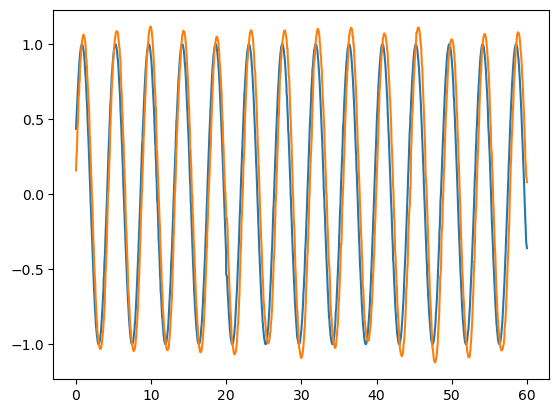

In [167]:
#### Print LQG desired position vd real position

plt.plot(time_LQR, desired_position_LQR[:, 0], label='Desired position')
plt.plot(time_LQR, position_optitrack_LQG[:, 0], label='Real position')

# plt.plot(time_LQG, desired_position_LQG[:, 0], label='Desired position')
# plt.plot(time_LQG, position_optitrack_LQG[:, 0], label='Real position')

# plt.plot(desired_position_LQG[:, 0], label='Desired position')
# plt.plot(desired_position_LQR[:, 0], label='Real position')


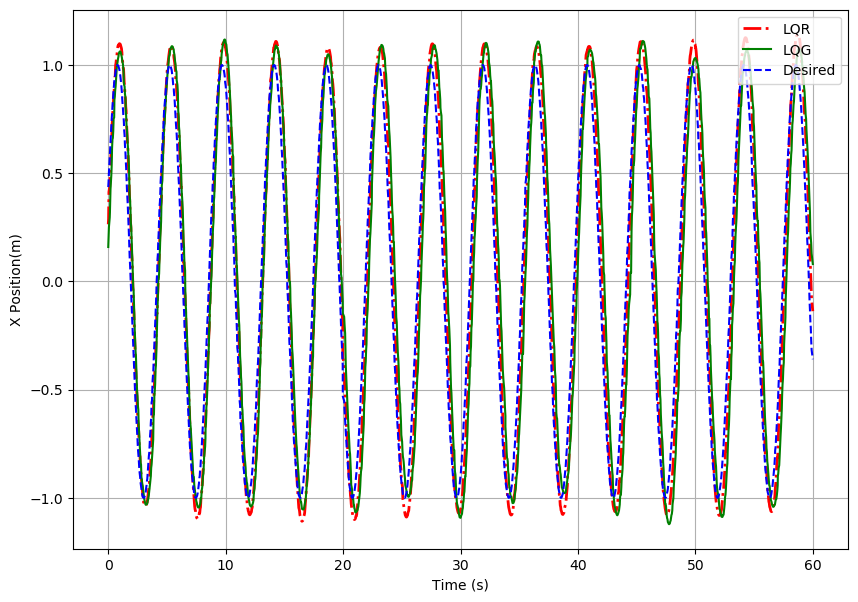

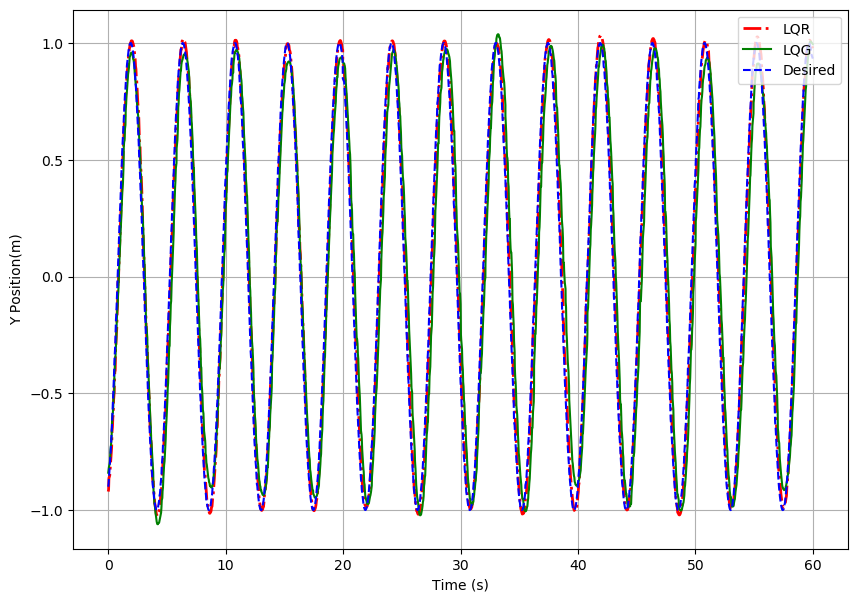

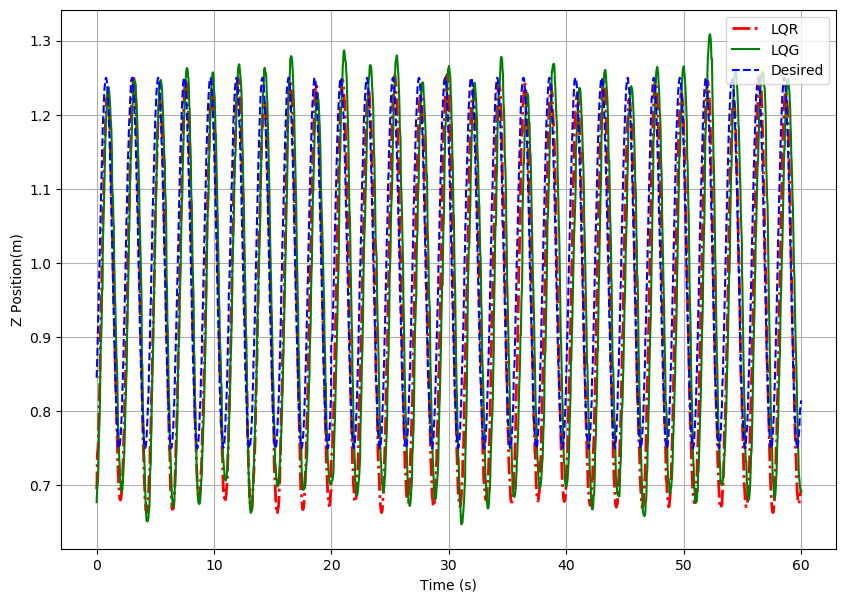

In [168]:
# X Dimension
plt.figure(figsize=(10, 7))
plt.plot(time_LQR, position_optitrack_LQR[:, 0], label='LQR', linestyle='-.', color='red', alpha=1, linewidth=2)
plt.plot(time_LQR, position_optitrack_LQG[:, 0], label='LQG', linestyle='-', color='green')
plt.plot(time_LQR, desired_position_LQR[:, 0], label='Desired', linestyle='--', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('X Position(m)')
plt.legend(loc='upper right')
## Upper right corner legend

plt.grid(True)

if save_flag:
    vectorized_image_path = 'position_comparison_X.pdf'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='pdf')

# Y Dimension
plt.figure(figsize=(10, 7))
plt.plot(time_LQR, position_optitrack_LQR[:, 1], label='LQR', linestyle='-.', color='red', alpha=1, linewidth=2)
plt.plot(time_LQR, position_optitrack_LQG[:, 1], label='LQG', linestyle='-', color='green')
plt.plot(time_LQR, desired_position_LQR[:, 1], label='Desired', linestyle='--', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Y Position(m)')
plt.legend(loc='upper right')
plt.grid(True)

if save_flag:
    vectorized_image_path = 'position_comparison_Y.pdf'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='pdf')

# Z Dimension
plt.figure(figsize=(10, 7))
plt.plot(time_LQR, position_optitrack_LQR[:, 2], label='LQR', linestyle='-.', color='red', alpha=1, linewidth=2)
plt.plot(time_LQR, position_optitrack_LQG[:, 2], label='LQG', linestyle='-', color='green')
plt.plot(time_LQR, desired_position_LQR[:, 2], label='Desired', linestyle='--', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Z Position(m)')
plt.legend(loc='upper right')
plt.grid(True)

if save_flag:
    vectorized_image_path = 'position_comparison_Z.pdf'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='pdf')

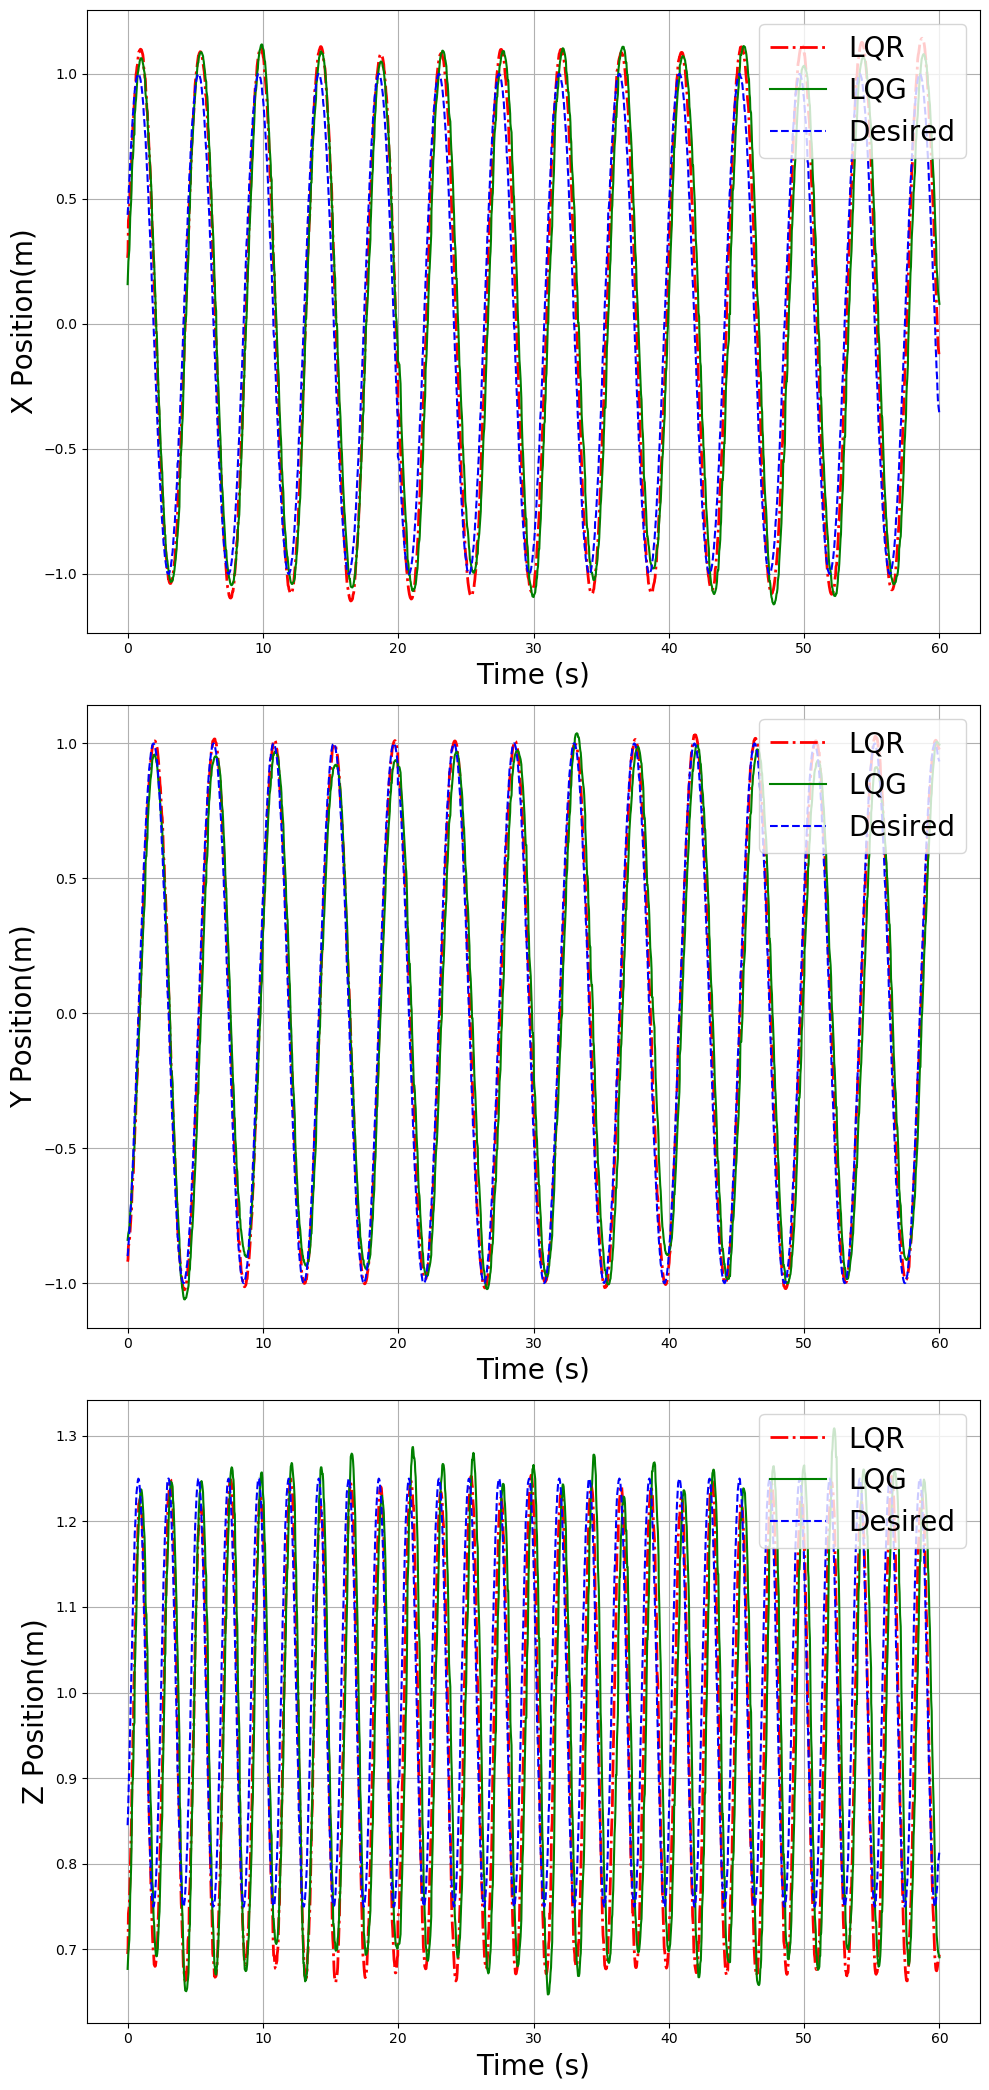

In [169]:
fig, axs = plt.subplots(3, 1, figsize=(10, 21))

fs = 20
# X Dimension
axs[0].plot(time_LQR, position_optitrack_LQR[:, 0], label='LQR', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[0].plot(time_LQR, position_optitrack_LQG[:, 0], label='LQG', linestyle='-', color='green')
axs[0].plot(time_LQR, desired_position_LQR[:, 0], label='Desired', linestyle='--', color='blue')
axs[0].set_xlabel('Time (s)', fontsize=fs)
axs[0].set_ylabel('X Position(m)', fontsize=fs)
axs[0].legend(loc='upper right', fontsize=fs)
axs[0].grid(True)

# Y Dimension
axs[1].plot(time_LQR, position_optitrack_LQR[:, 1], label='LQR', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[1].plot(time_LQR, position_optitrack_LQG[:, 1], label='LQG', linestyle='-', color='green')
axs[1].plot(time_LQR, desired_position_LQR[:, 1], label='Desired', linestyle='--', color='blue')
axs[1].set_xlabel('Time (s)', fontsize=fs)
axs[1].set_ylabel('Y Position(m)', fontsize=fs)
axs[1].legend(loc='upper right', fontsize=fs)
axs[1].grid(True)

# Z Dimension
axs[2].plot(time_LQR, position_optitrack_LQR[:, 2], label='LQR', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[2].plot(time_LQR, position_optitrack_LQG[:, 2], label='LQG', linestyle='-', color='green')
axs[2].plot(time_LQR, desired_position_LQR[:, 2], label='Desired', linestyle='--', color='blue')
axs[2].set_xlabel('Time (s)', fontsize=fs)
axs[2].set_ylabel('Z Position(m)', fontsize=fs)
axs[2].legend(loc='upper right', fontsize=fs)
axs[2].grid(True)

plt.tight_layout()

if save_flag:

    vectorized_image_path = 'position_comparison_subplot_chosed.pdf'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='pdf')

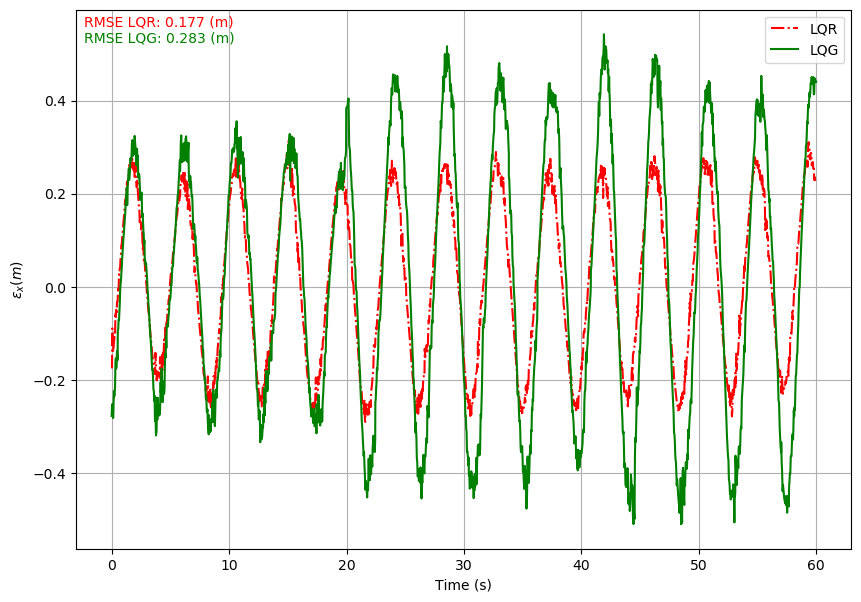

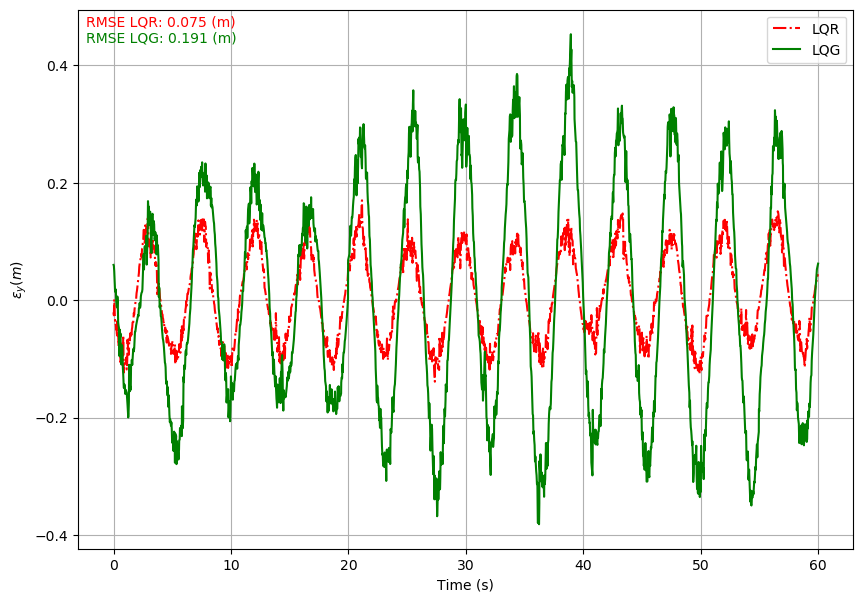

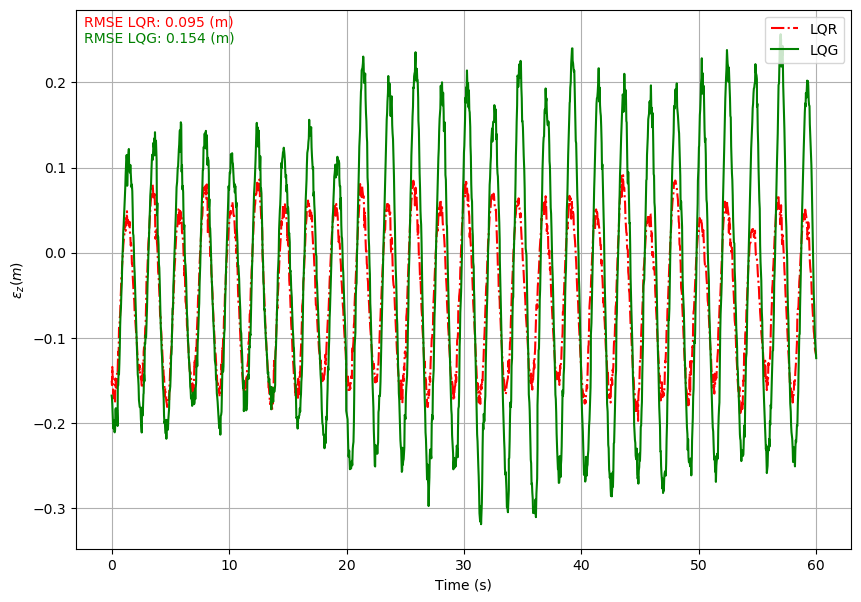

In [170]:
position_optitrack = position_optitrack_LQR
position_kalman = position_optitrack_LQG
desired_position = desired_position_LQR
time = time_LQR

error_optitrack = position_optitrack - desired_position
error_kalman = position_kalman - desired_position

rmse_optitrack = np.sqrt(np.mean(error_optitrack**2, axis=0))
rmse_kalman = np.sqrt(np.mean(error_kalman**2, axis=0))

dimensions = ['X', 'Y', 'Z']
dimension_symbols = ['x', 'y', 'z']  # Symbols for each dimension

# Plotting and saving separately for each dimension
for i in range(3):
    plt.figure(figsize=(10, 7))
    plt.plot(time, error_optitrack[:, i], label=f'LQR', linestyle='-.', color='red')
    plt.plot(time, error_kalman[:, i], label=f'LQG', linestyle='-', color='green')
    plt.xlabel('Time (s)')
    plt.ylabel(f'$\epsilon_{{{dimension_symbols[i]}}} (m)$')  # Using epsilon for error
    plt.grid(True)
    plt.legend(loc='upper right')

    # Annotate
    plt.annotate(f'RMSE LQG: {rmse_kalman[i]:.3f} (m)', xy=(0.01, 0.94), xycoords='axes fraction', fontsize=10, color='green')
    plt.annotate(f'RMSE LQR: {rmse_optitrack[i]:.3f} (m)', xy=(0.01, 0.97), xycoords='axes fraction', fontsize=10, color='red')
    
    if save_flag:
        vectorized_image_path = f'error_comparison_{dimensions[i]}.pdf'
        full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
        plt.savefig(full_vectorized_image_path, format='pdf')

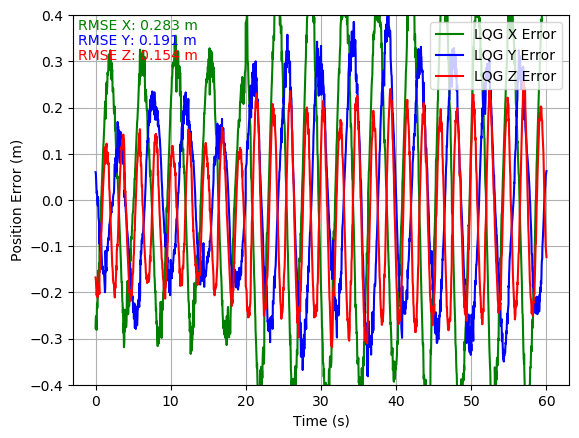

In [171]:
### Position error plot

# Plotting the error
plt.plot(time, error_kalman[:, 0], label='LQG X Error', linestyle='-', color='green')
plt.plot(time, error_kalman[:, 1], label='LQG Y Error', linestyle='-', color='blue')
plt.plot(time, error_kalman[:, 2], label='LQG Z Error', linestyle='-', color='red')

# Annotating RMSE on the plot
plt.annotate(f'RMSE X: {rmse_kalman[0]:.3f} m', xy=(0.01, 0.96), xycoords='axes fraction', fontsize=10, color='green')
plt.annotate(f'RMSE Y: {rmse_kalman[1]:.3f} m', xy=(0.01, 0.92), xycoords='axes fraction', fontsize=10, color='blue')
plt.annotate(f'RMSE Z: {rmse_kalman[2]:.3f} m ', xy=(0.01, 0.88), xycoords='axes fraction', fontsize=10, color='red')

# Setting the title and labels
# plt.title('Kalman Position Error Comparison: OptiTrack vs. Kalman (XYZ Dimensions)')
plt.xlabel('Time (s)')
plt.ylabel('Position Error (m)')
plt.grid(True)
plt.legend(loc='upper right')

plt.ylim([-0.4, 0.4])

if save_flag:
    plt.savefig(os.path.join(save_image_path, 'LQG_position_error_xyz.pdf'), format='pdf')

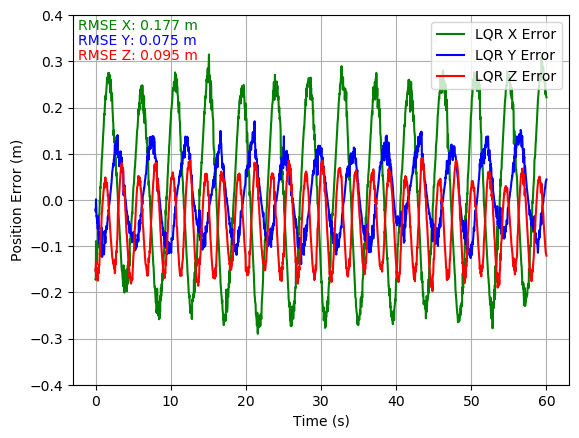

In [172]:
### Position error plot

# Plotting the error
plt.plot(time, error_optitrack[:, 0], label='LQR X Error', linestyle='-', color='green')
plt.plot(time, error_optitrack[:, 1], label='LQR Y Error', linestyle='-', color='blue')
plt.plot(time, error_optitrack[:, 2], label='LQR Z Error', linestyle='-', color='red')

# Annotating RMSE on the plot
plt.annotate(f'RMSE X: {rmse_optitrack[0]:.3f} m', xy=(0.01, 0.96), xycoords='axes fraction', fontsize=10, color='green')
plt.annotate(f'RMSE Y: {rmse_optitrack[1]:.3f} m', xy=(0.01, 0.92), xycoords='axes fraction', fontsize=10, color='blue')
plt.annotate(f'RMSE Z: {rmse_optitrack[2]:.3f} m ', xy=(0.01, 0.88), xycoords='axes fraction', fontsize=10, color='red')

# Setting the title and labels
# plt.title('Kalman Position Error Comparison: OptiTrack vs. Kalman (XYZ Dimensions)')
plt.xlabel('Time (s)')
plt.ylabel('Position Error (m)')
plt.grid(True)
plt.legend(loc='upper right')

plt.ylim([-0.4, 0.4])

if save_flag:
    plt.savefig(os.path.join(save_image_path, 'LQR_position_error_xyz.pdf'), format='pdf')

# 2D

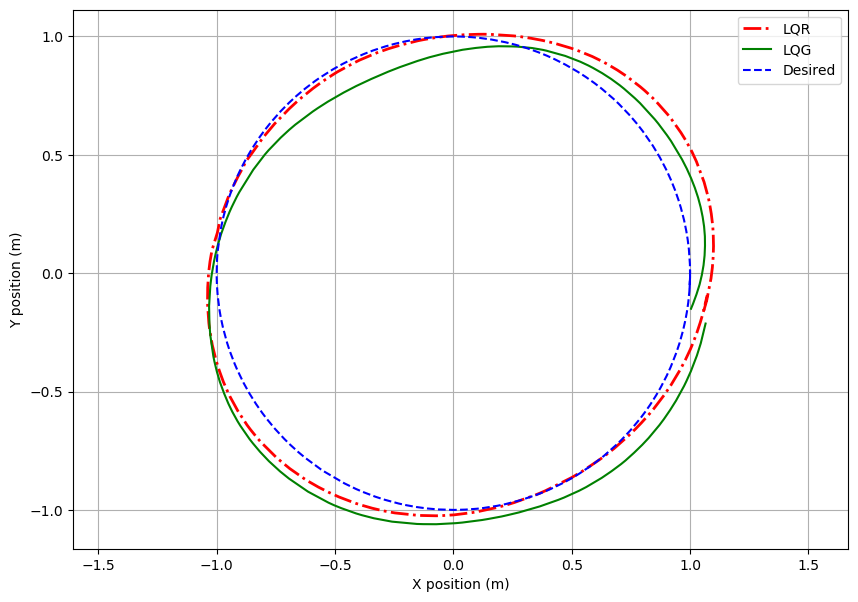

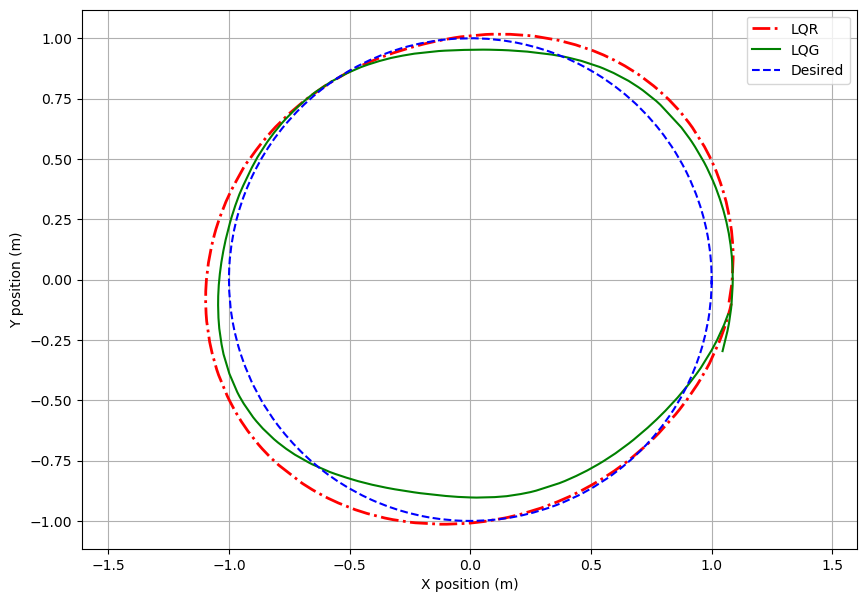

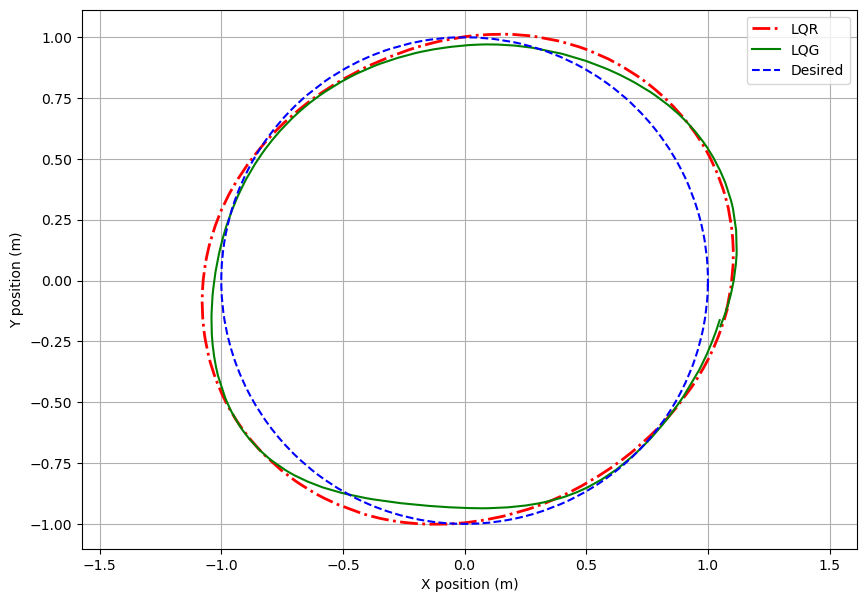

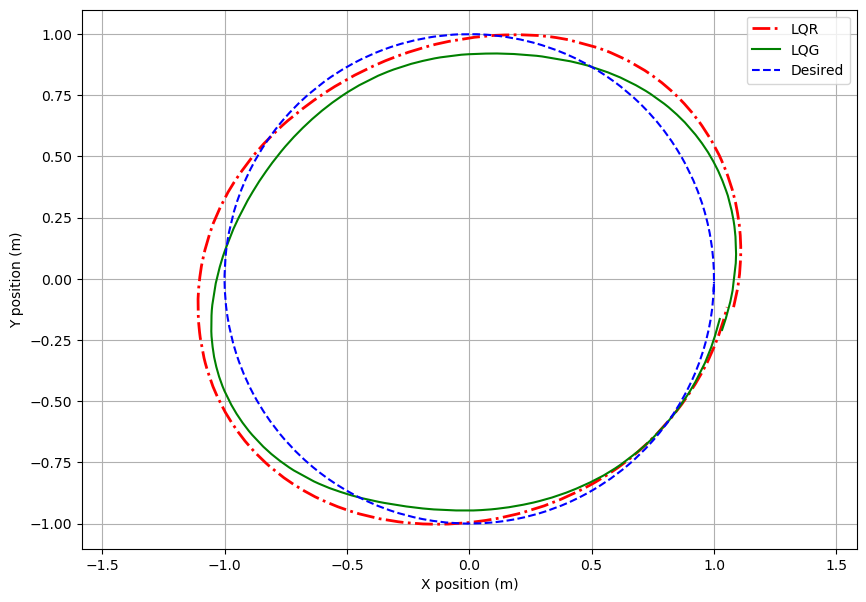

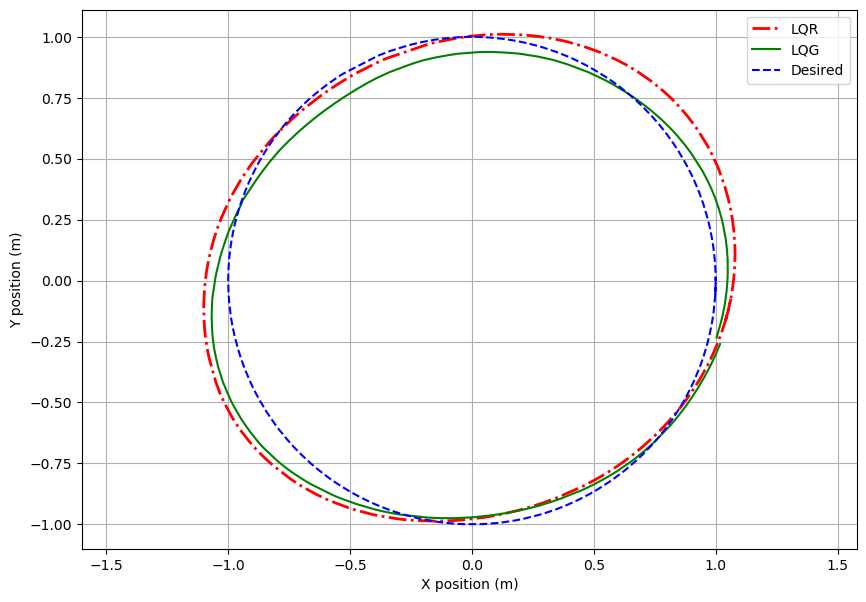

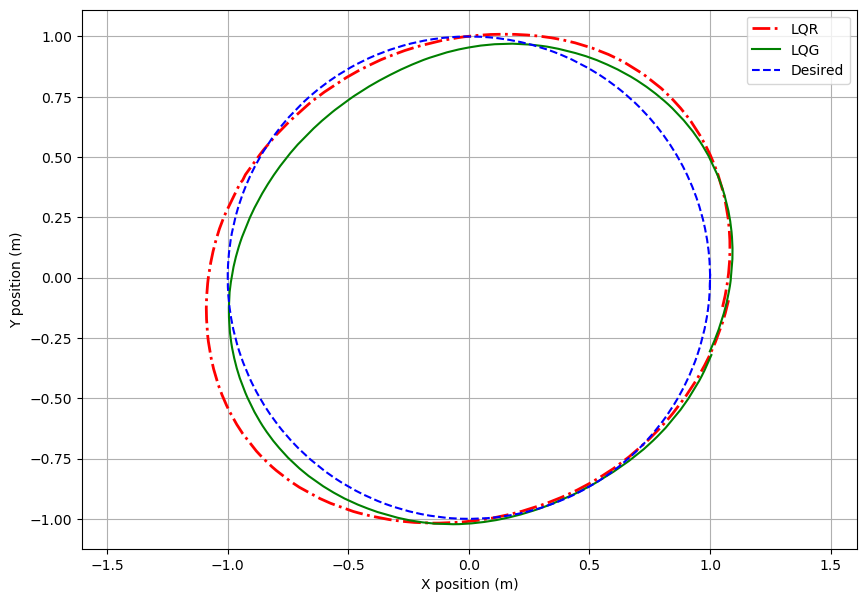

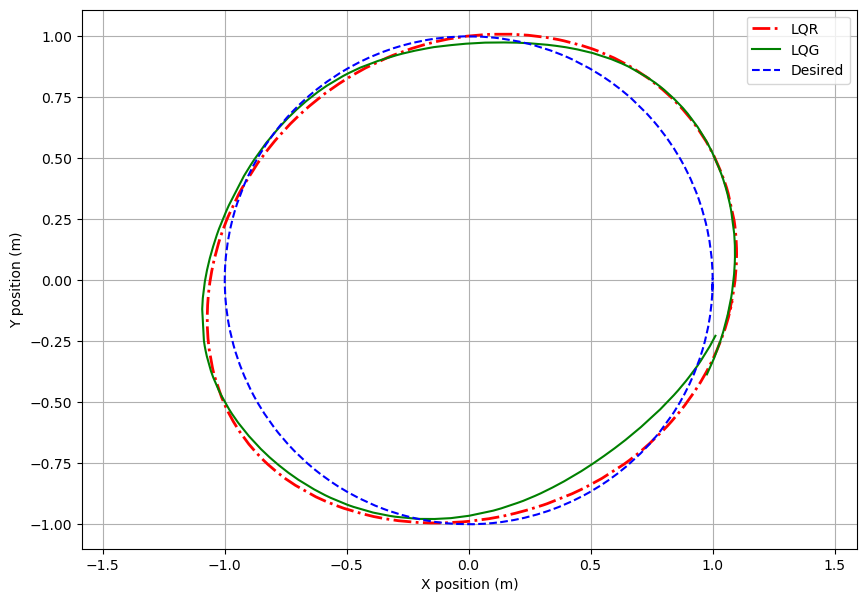

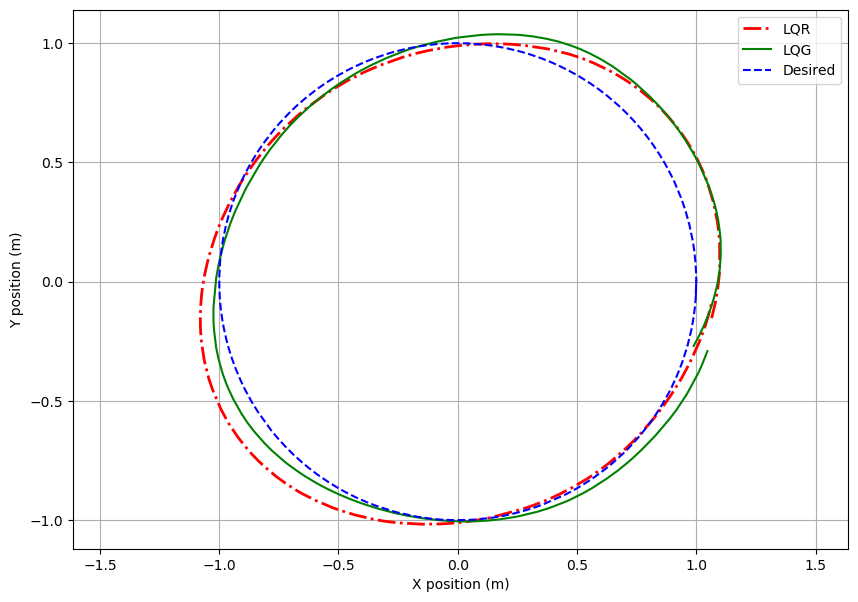

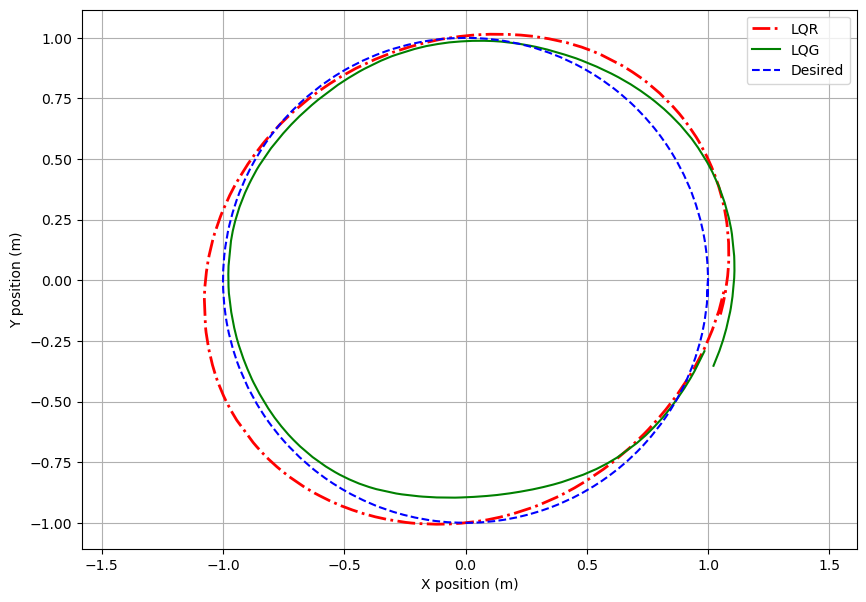

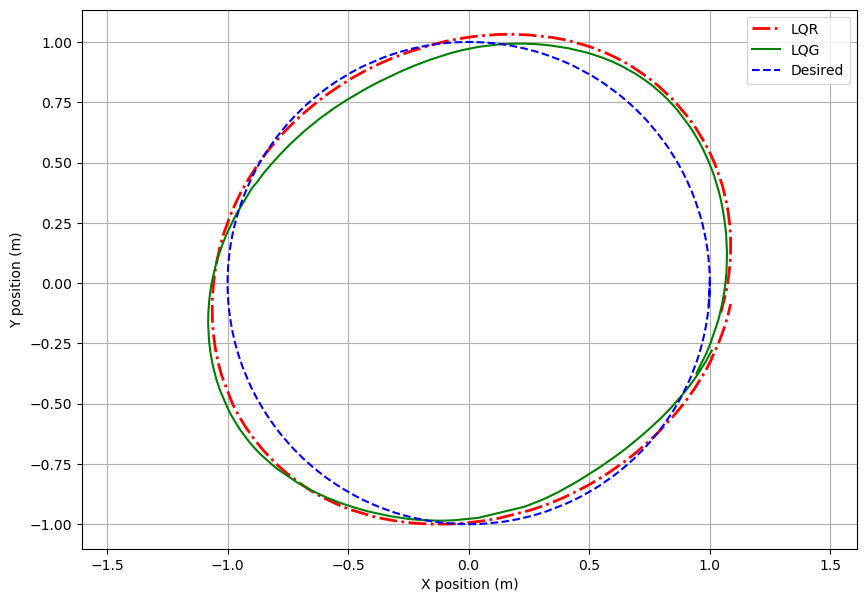

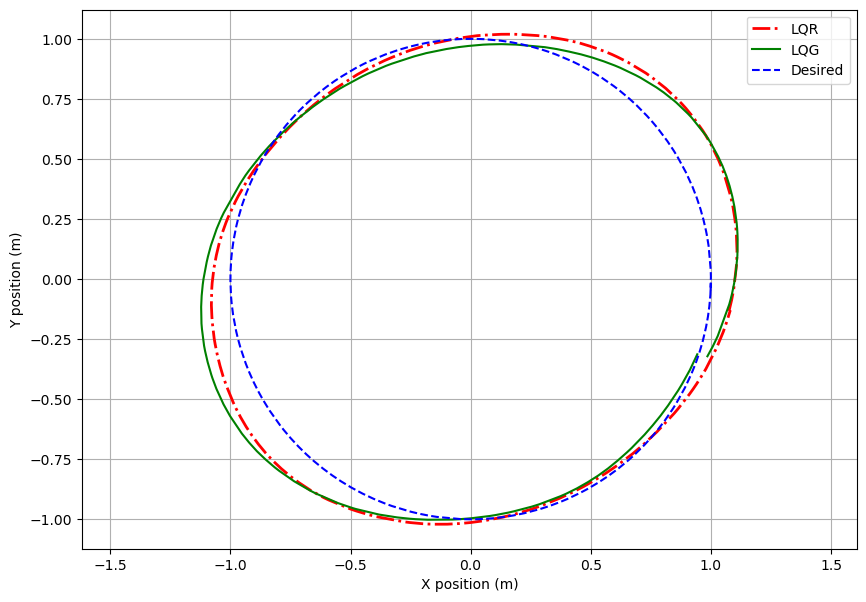

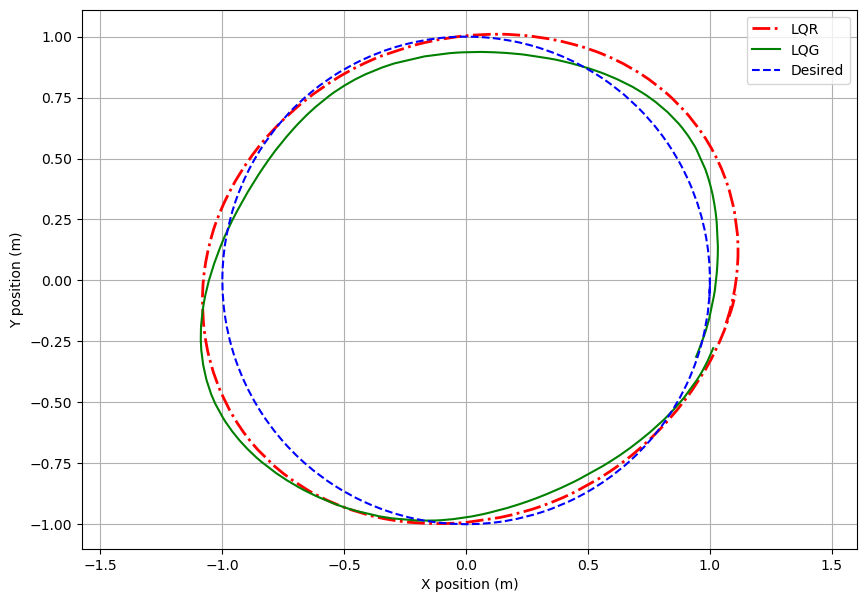

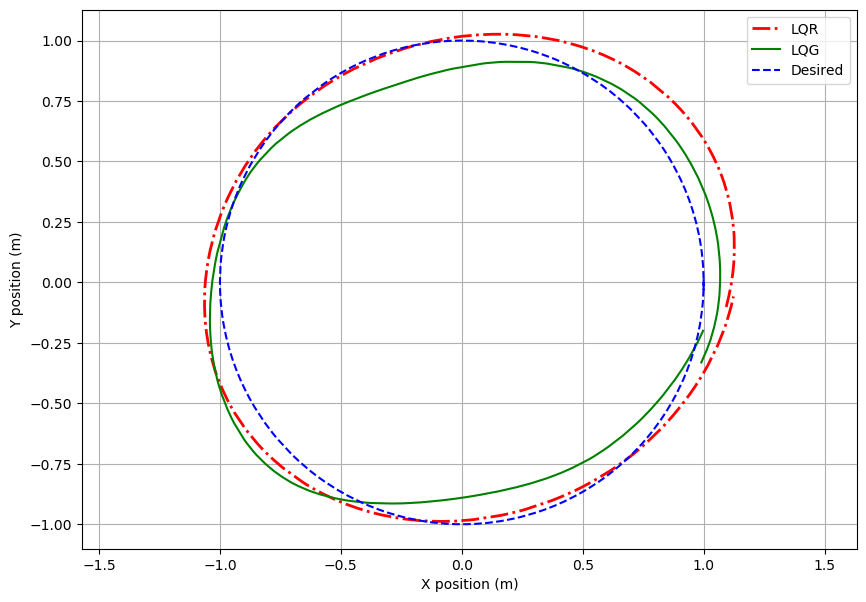

In [173]:
### plotting the x and y simultaniously
# Iterate over consecutive peaks
peaks = LQR_peaks
for i in range(len(peaks) - 1):
    # Cut the data between the current and next peak
    start_index = peaks[i] - 1
    end_index = peaks[i + 1] +1
    
    time_cut = time[start_index:end_index]
    desired_position_cut = desired_position[start_index:end_index]
    position_kalman_cut = position_kalman[start_index:end_index]
    position_optitrack_cut = position_optitrack[start_index:end_index]
    plt.figure(figsize=(10, 7))

    plt.plot(position_optitrack_cut[:, 0], position_optitrack_cut[:, 1], label='LQR', linestyle = '-.',markersize=4, color='red', alpha=1, linewidth=2)
    plt.plot(position_kalman_cut[:, 0], position_kalman_cut[:, 1], label='LQG', linestyle='-', color='green')
    plt.plot(desired_position_cut[:, 0], desired_position_cut[:, 1], label='Desired', linestyle='--', color='blue')

    # plt.title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X and Y Dimension)')
    plt.xlabel('X position (m)')
    plt.ylabel('Y position (m)')

    plt.legend()
    plt.grid(True)

    plt.axis('equal')

    if save_flag:
        vectorized_image_path = f'2D_position_comparison_xy_{i}.pdf'
        full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
        plt.savefig(full_vectorized_image_path, format='pdf')

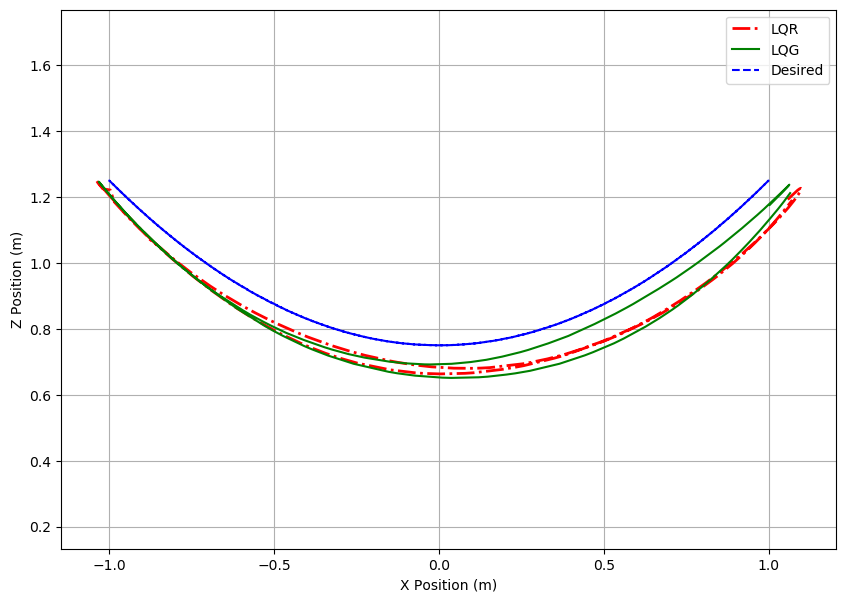

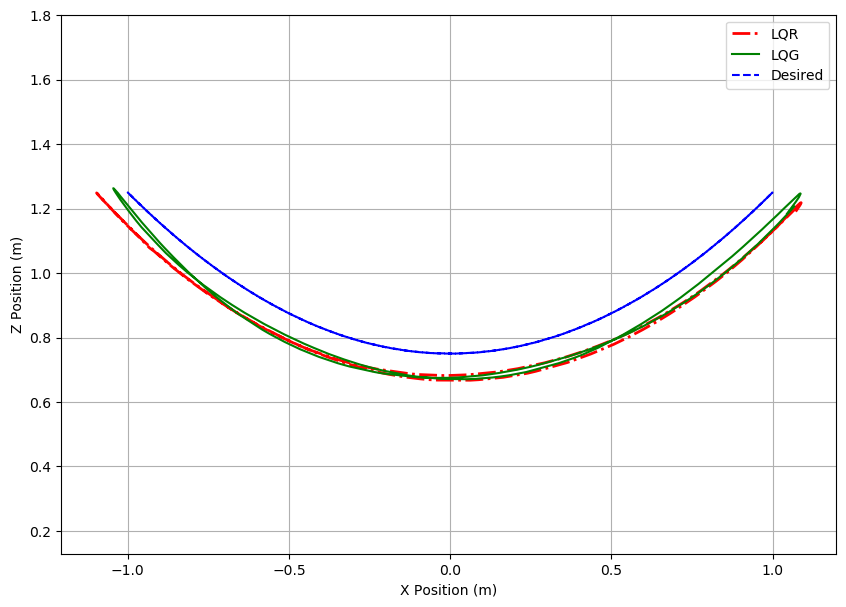

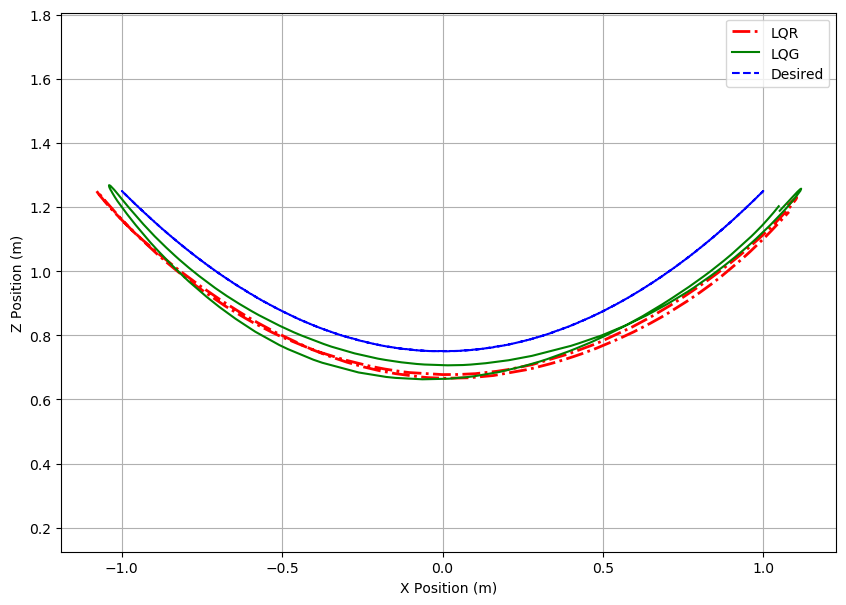

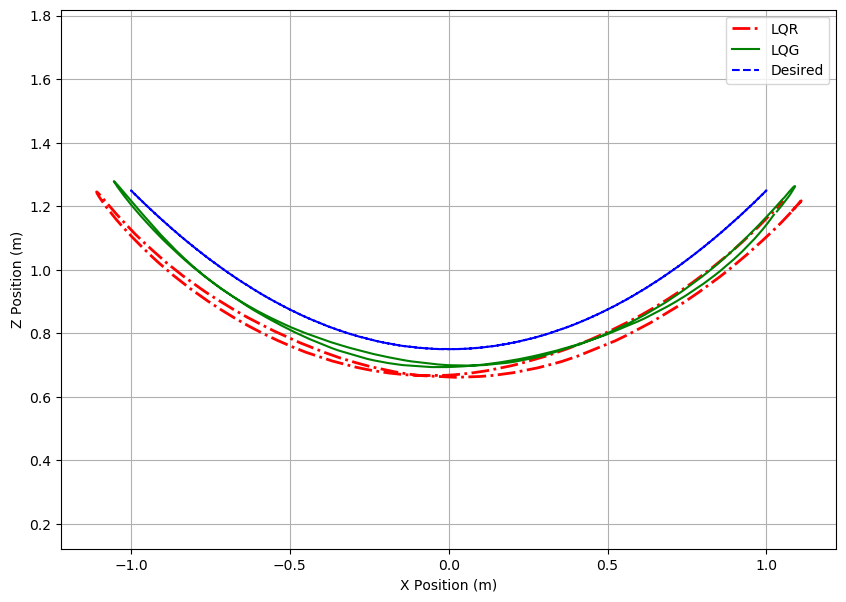

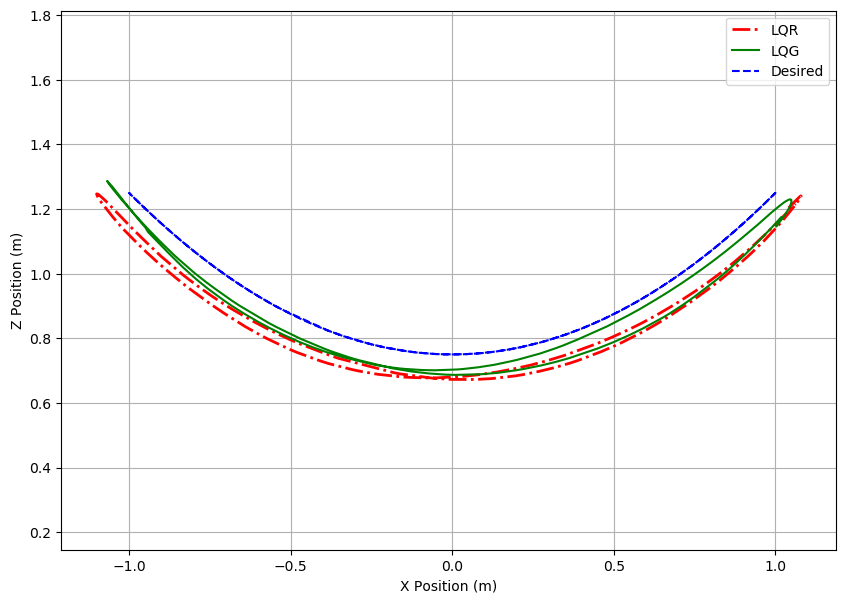

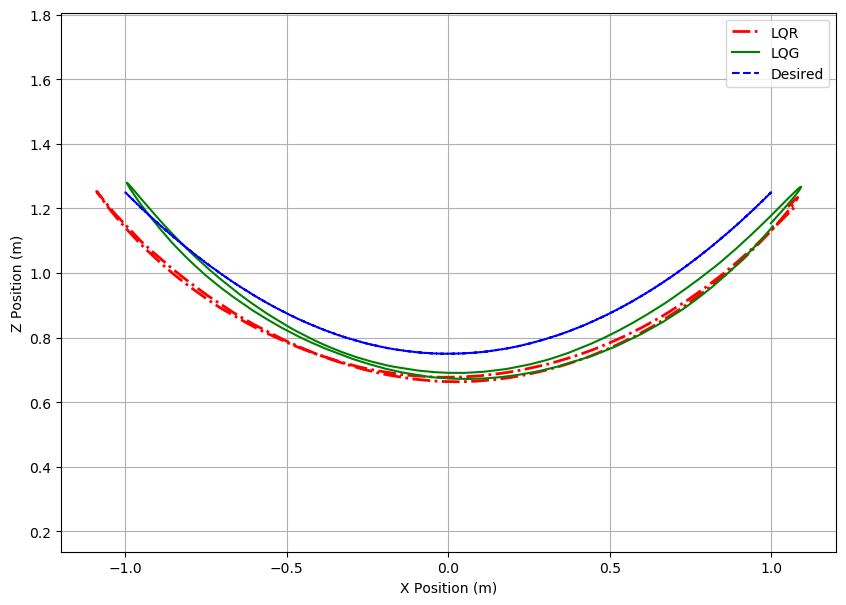

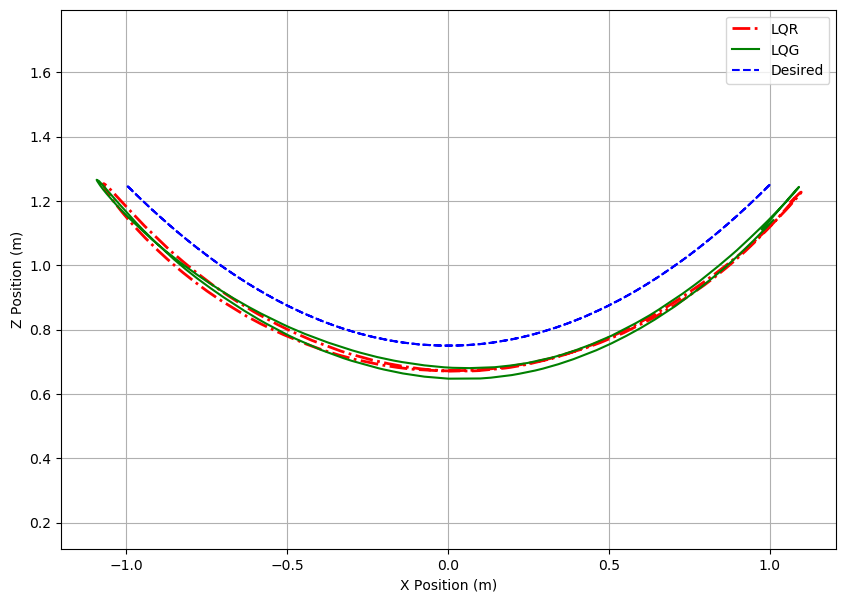

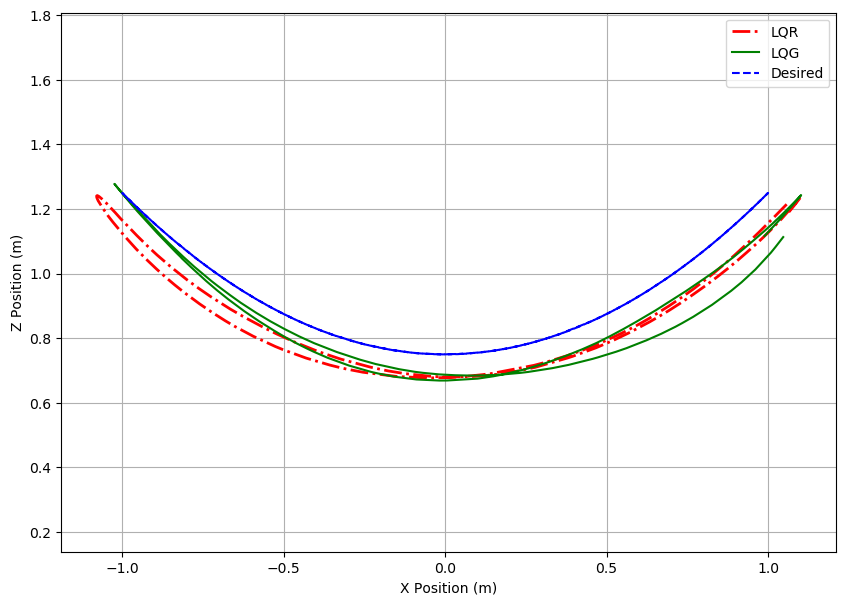

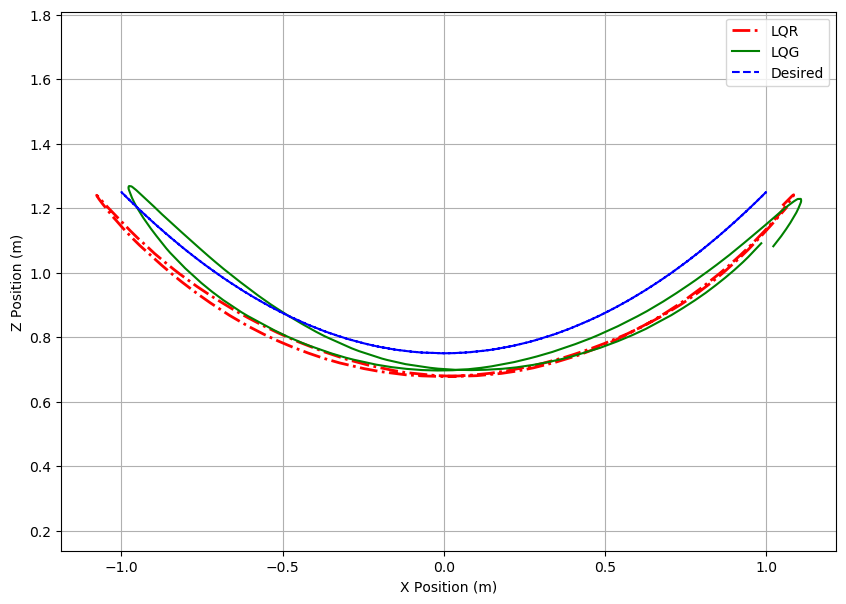

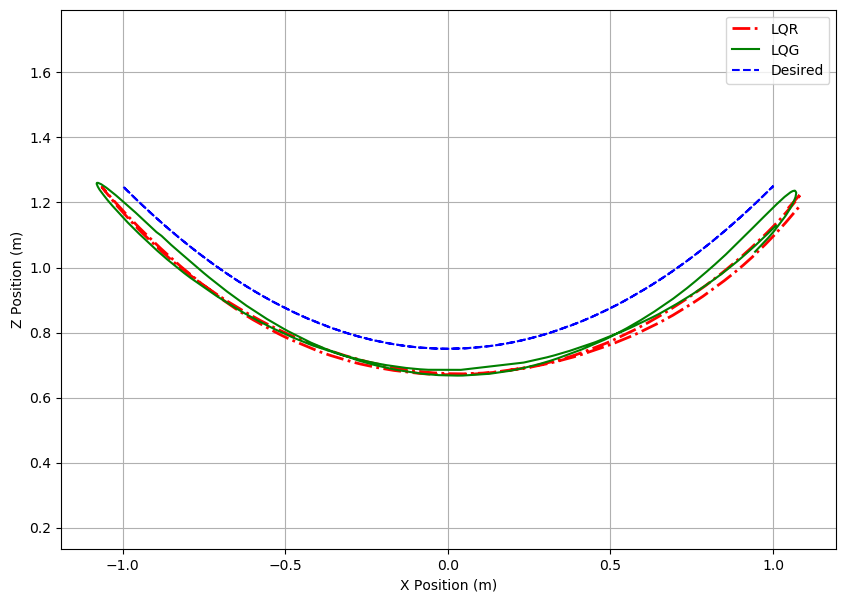

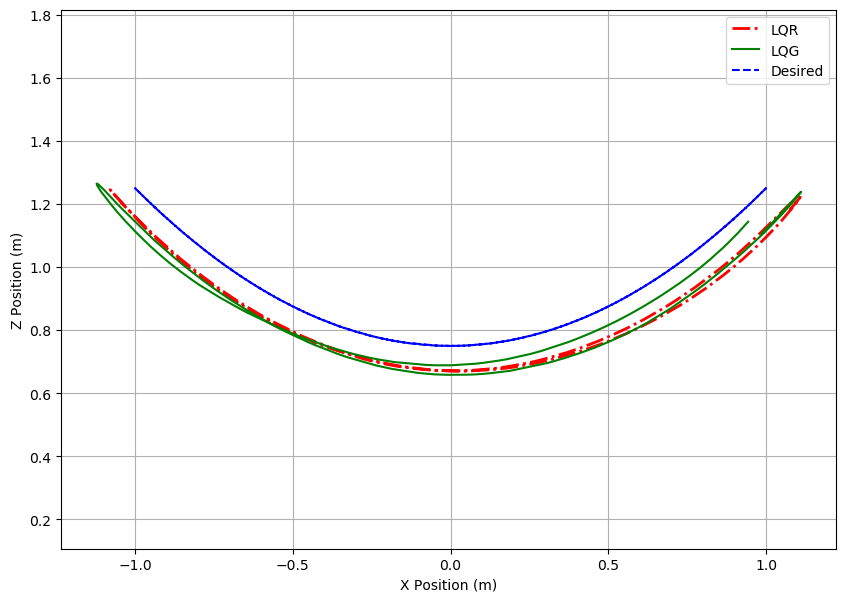

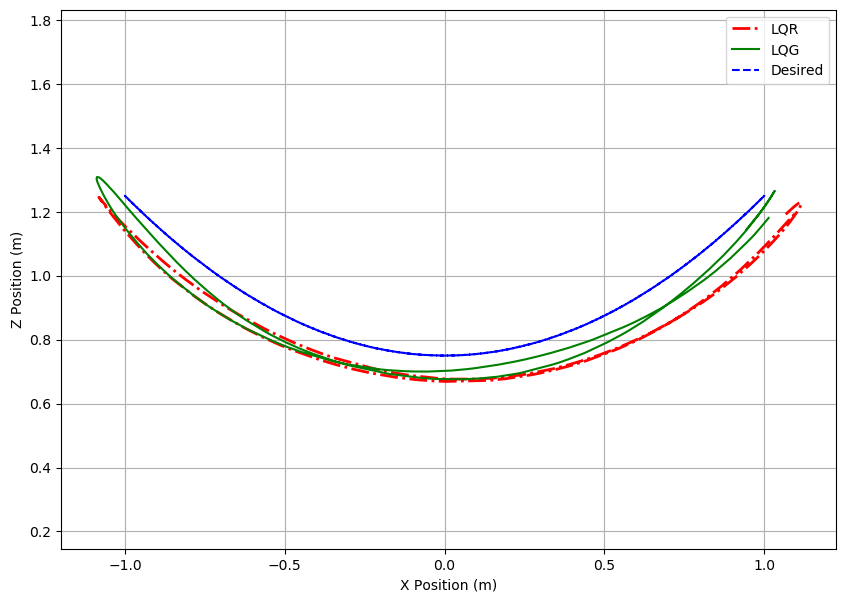

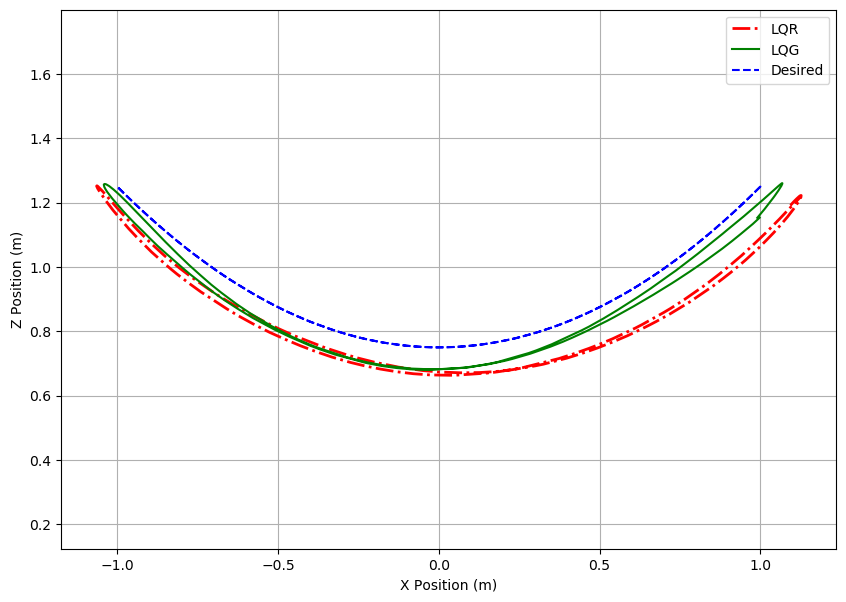

In [174]:
### plotting the x and z simultaniously
# Iterate over consecutive peaks
for i in range(len(peaks) - 1):
    # Cut the data between the current and next peak
    start_index = peaks[i] - 1
    end_index = peaks[i + 1] +1
    
    time_cut = time[start_index:end_index]
    desired_position_cut = desired_position[start_index:end_index]
    position_kalman_cut = position_kalman[start_index:end_index]
    position_optitrack_cut = position_optitrack[start_index:end_index]
    plt.figure(figsize=(10, 7))

    plt.plot(position_optitrack_cut[:, 0], position_optitrack_cut[:, 2], label='LQR', linestyle = '-.',markersize=4, color='red', alpha=1, linewidth=2)
    plt.plot(position_kalman_cut[:, 0], position_kalman_cut[:, 2], label='LQG', linestyle='-', color='green')
    plt.plot(desired_position_cut[:, 0], desired_position_cut[:, 2], label='Desired', linestyle='--', color='blue')

    # plt.title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X and Y Dimension)')
    plt.xlabel('X Position (m)')
    plt.ylabel('Z Position (m)')
    plt.legend()
    plt.grid(True)

    plt.axis('equal')

    if save_flag:
        vectorized_image_path = f'2D_position_comparison_xz_{i}.pdf'
        full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
        plt.savefig(full_vectorized_image_path, format='pdf')

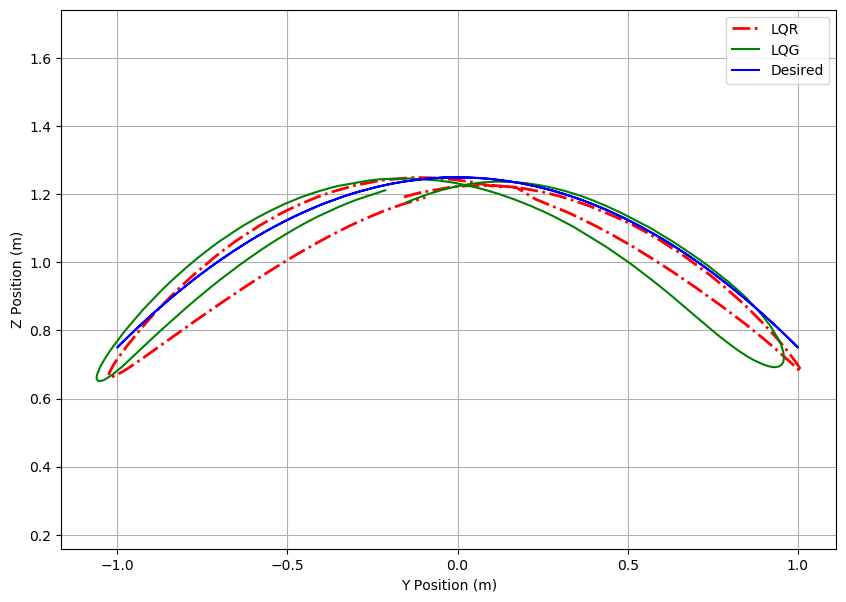

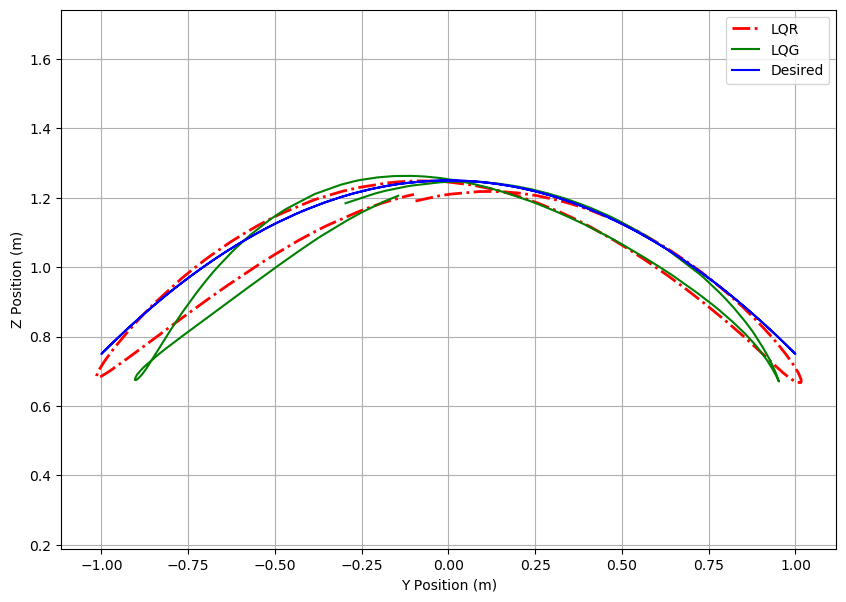

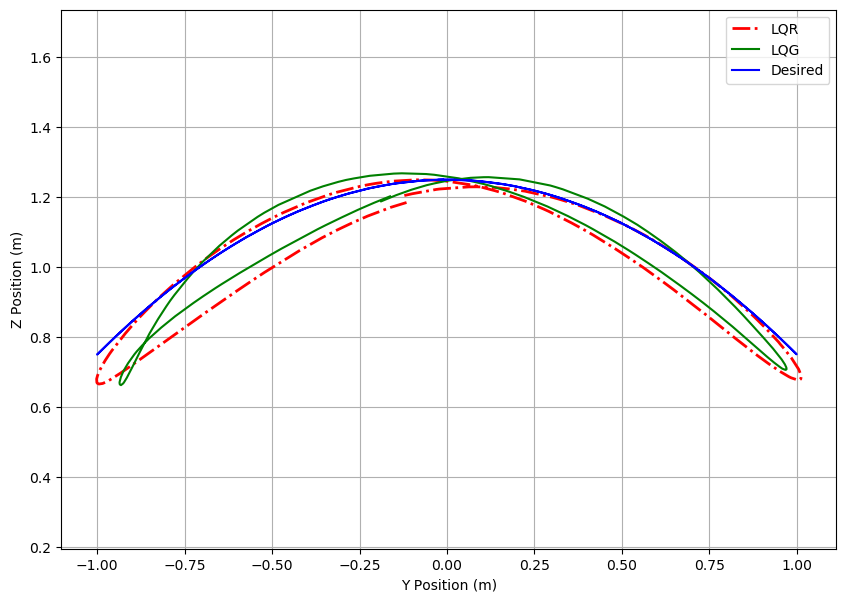

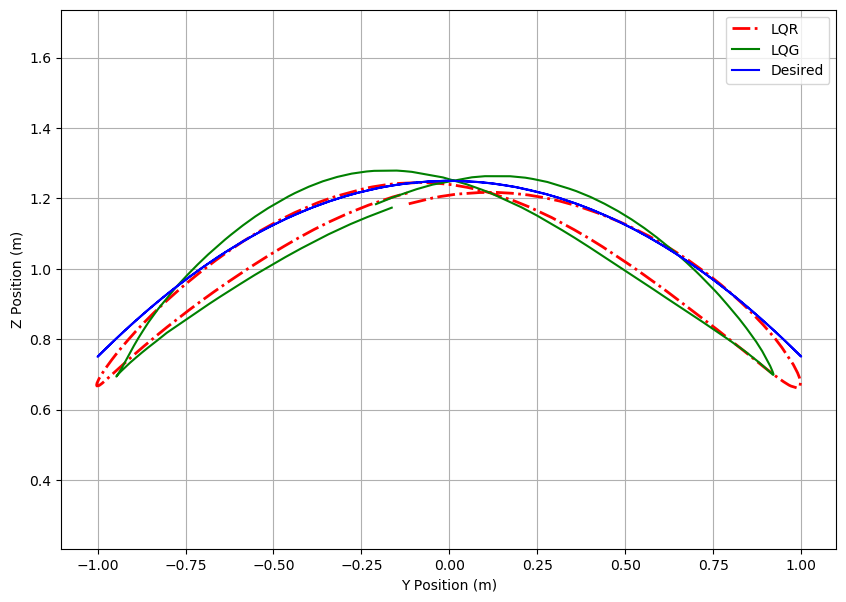

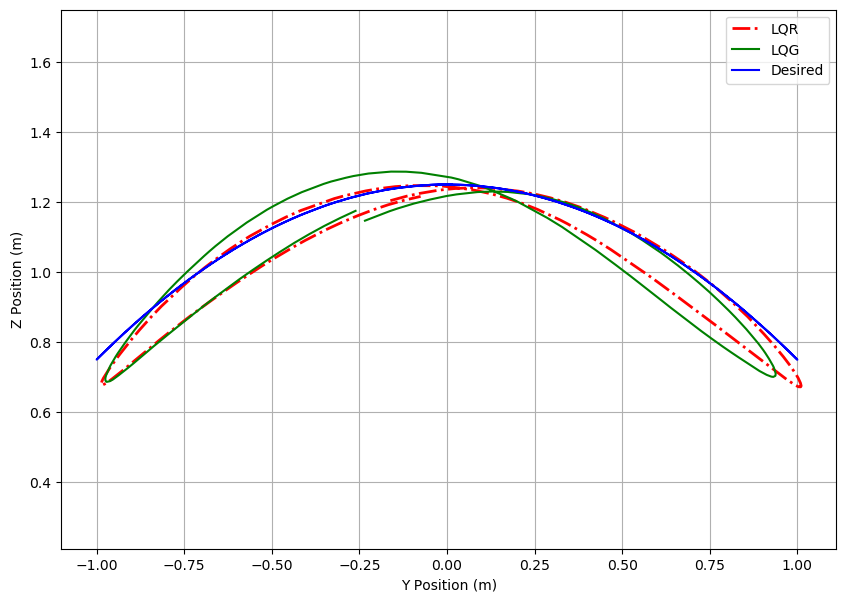

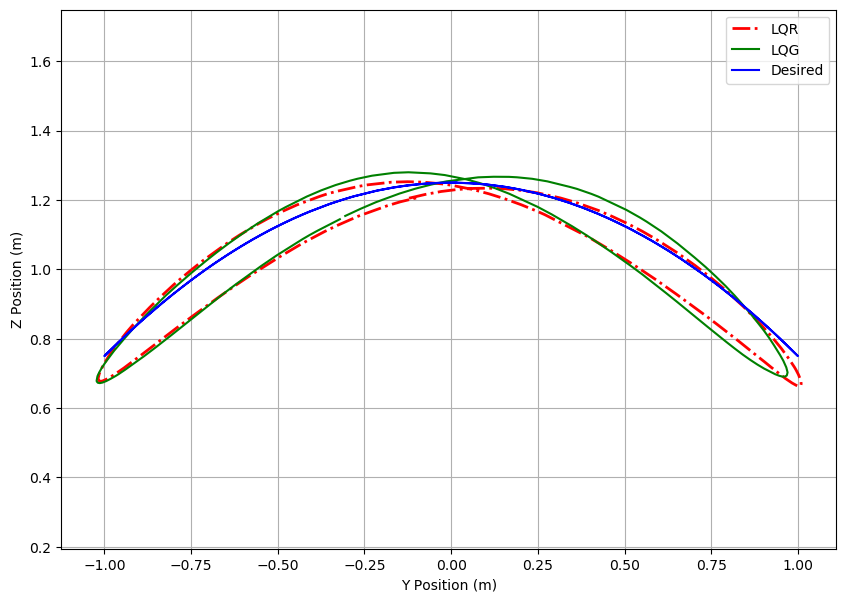

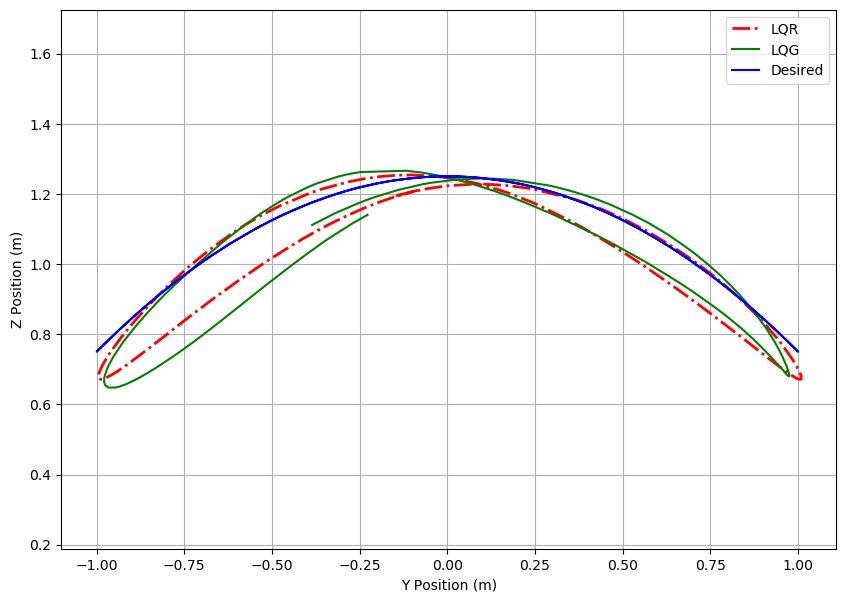

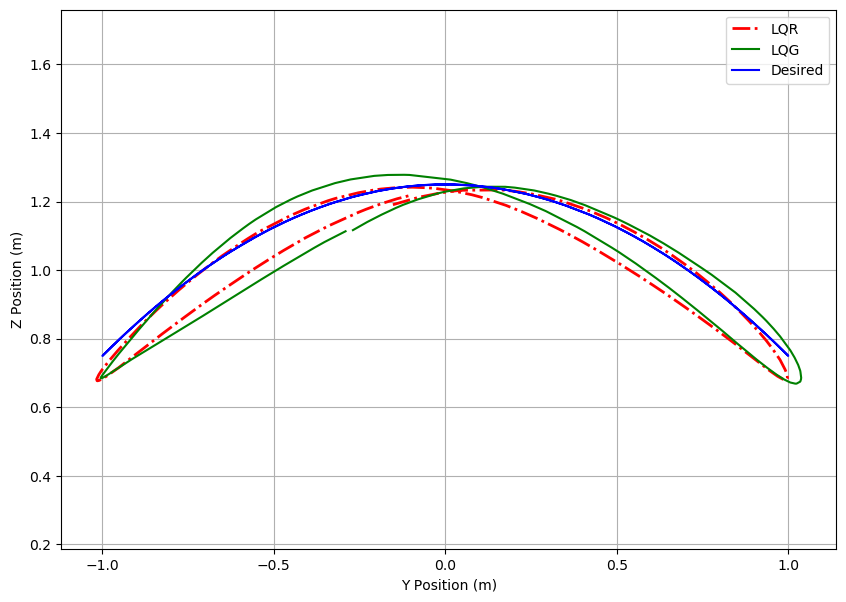

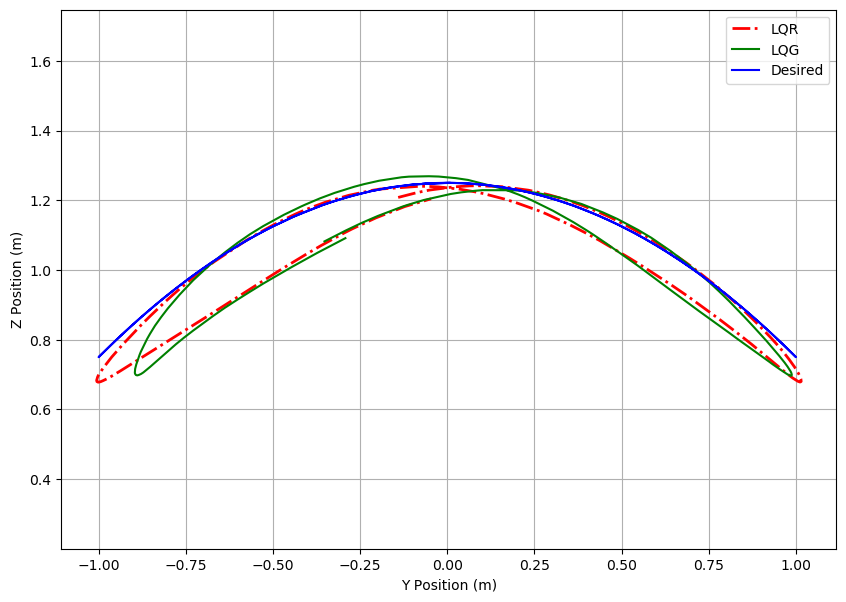

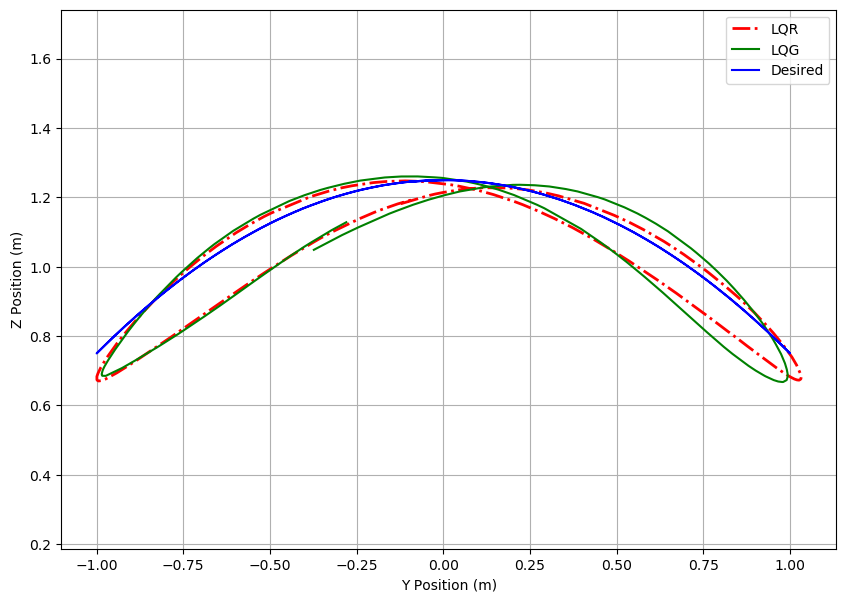

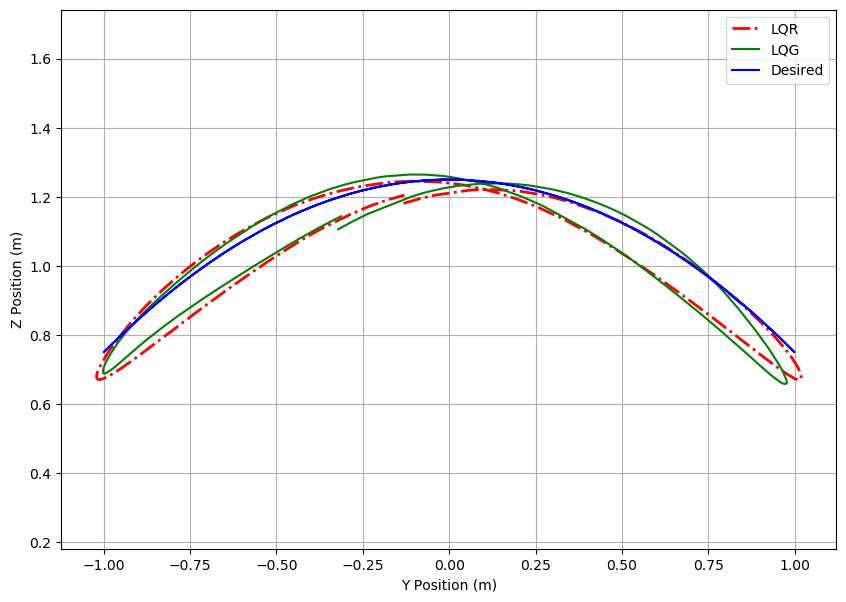

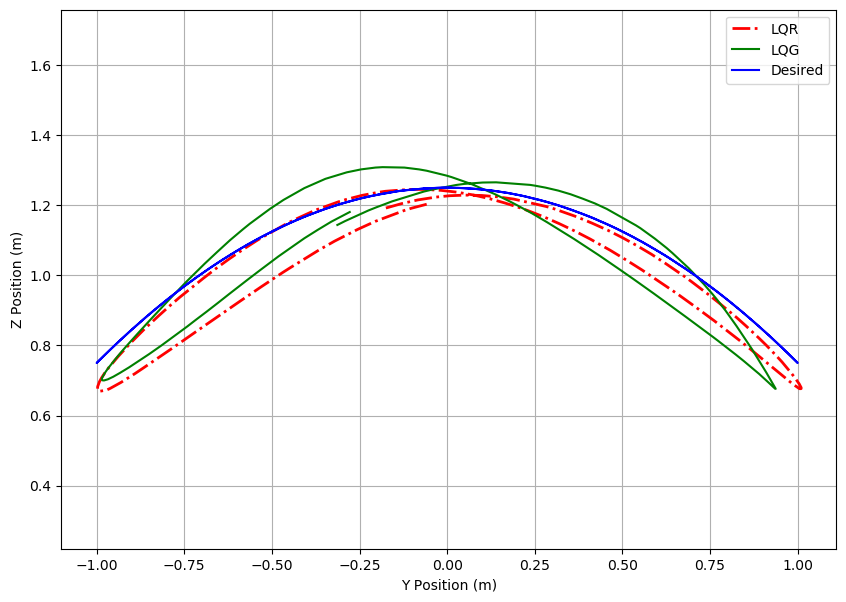

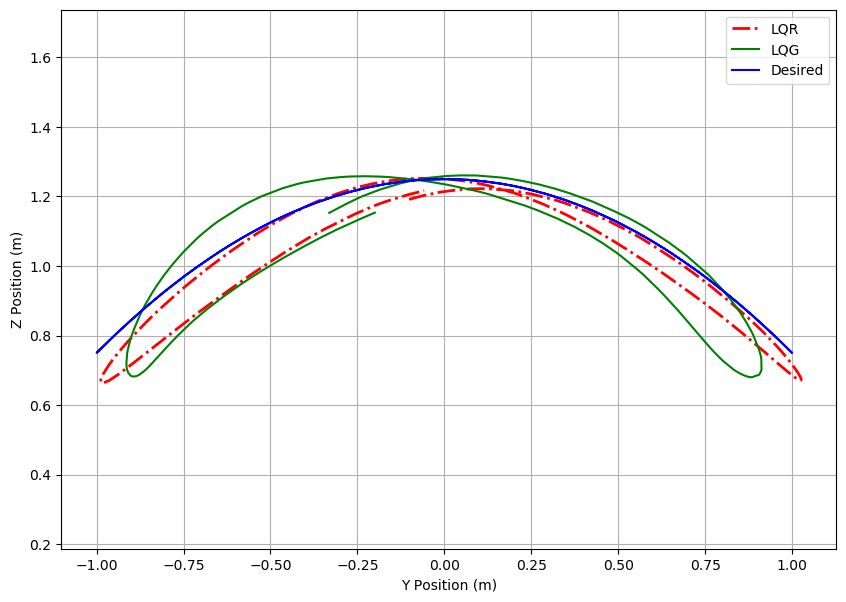

In [175]:
### plotting the x and z simultaniously
# Iterate over consecutive peaks
for i in range(len(peaks) - 1):
    # Cut the data between the current and next peak
    start_index = peaks[i] - 1
    end_index = peaks[i + 1] +1
    
    time_cut = time[start_index:end_index]
    desired_position_cut = desired_position[start_index:end_index]
    position_kalman_cut = position_kalman[start_index:end_index]
    position_optitrack_cut = position_optitrack[start_index:end_index]
    plt.figure(figsize=(10, 7))

    plt.plot(position_optitrack_cut[:, 1], position_optitrack_cut[:, 2], label='LQR', linestyle = '-.',markersize=4, color='red', alpha=1, linewidth=2)
    plt.plot(position_kalman_cut[:, 1], position_kalman_cut[:, 2], label='LQG', linestyle='-', color='green')
    plt.plot(desired_position_cut[:, 1], desired_position_cut[:, 2], label='Desired', linestyle='-', color='blue')

    # plt.title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X and Y Dimension)')
    plt.xlabel('Y Position (m)')
    plt.ylabel('Z Position (m)')
    plt.legend()
    plt.grid(True)

    plt.axis('equal')

    if save_flag:
        vectorized_image_path = f'2D_position_comparison_yz_{i}.pdf'
        full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
        plt.savefig(full_vectorized_image_path, format='pdf')

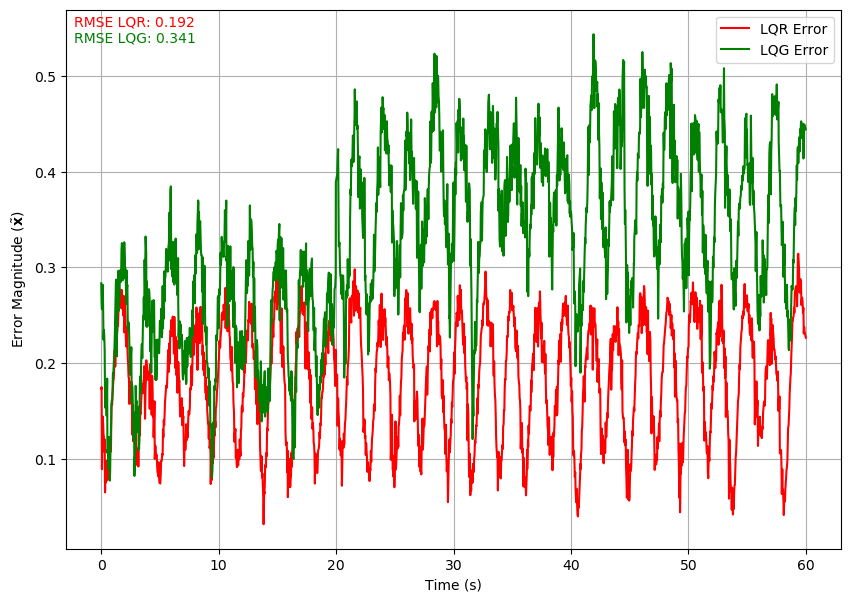

In [176]:
# Calculate the 2D point-to-point errors
point_to_point_error_kalman = np.linalg.norm(position_kalman[:, 0:2] - desired_position[:, 0:2], axis=1)
point_to_point_error_optitrack = np.linalg.norm(position_optitrack[:, 0:2] - desired_position[:, 0:2], axis=1)

# Calculate RMSE for point-to-point error
rmse_kalman_2d = np.sqrt(np.mean(point_to_point_error_kalman**2))
rmse_optitrack_2d = np.sqrt(np.mean(point_to_point_error_optitrack**2))

# Plotting the point-to-point errors
plt.figure(figsize=(10, 7))
plt.plot(time, point_to_point_error_optitrack, label='LQR Error', color='red')
plt.plot(time, point_to_point_error_kalman, label='LQG Error', color='green')

# Annotate the RMSE on the plot
plt.annotate(f'RMSE LQG: {rmse_kalman_2d:.3f}', xy=(0.01, 0.94), xycoords='axes fraction', fontsize=10, color='green')
plt.annotate(f'RMSE LQR: {rmse_optitrack_2d:.3f}', xy=(0.01, 0.97), xycoords='axes fraction', fontsize=10, color='red')


# plt.title('2D Point-to-Point Error')
plt.xlabel('Time (s)')
plt.ylabel(r'Error Magnitude ($\tilde{\mathbf{x}}$)')
plt.legend()
plt.grid(True)

if save_flag:
    vectorized_image_path = '2D_point_to_point_error.pdf'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='pdf')

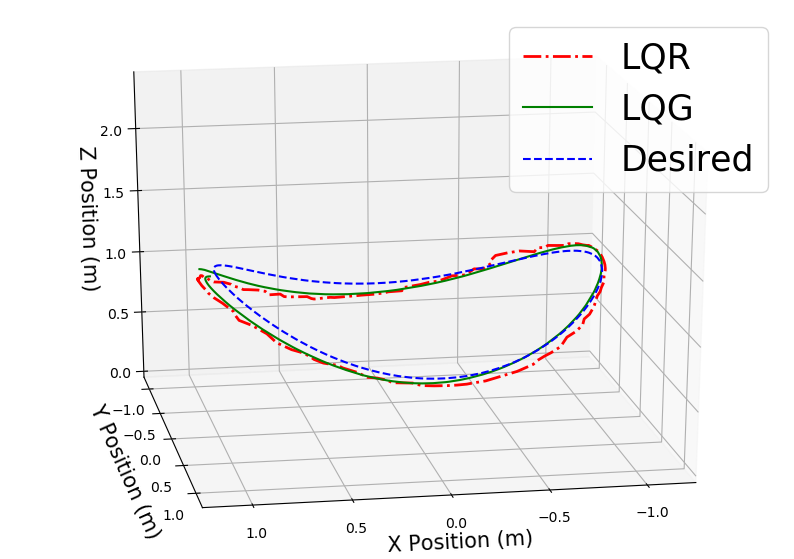

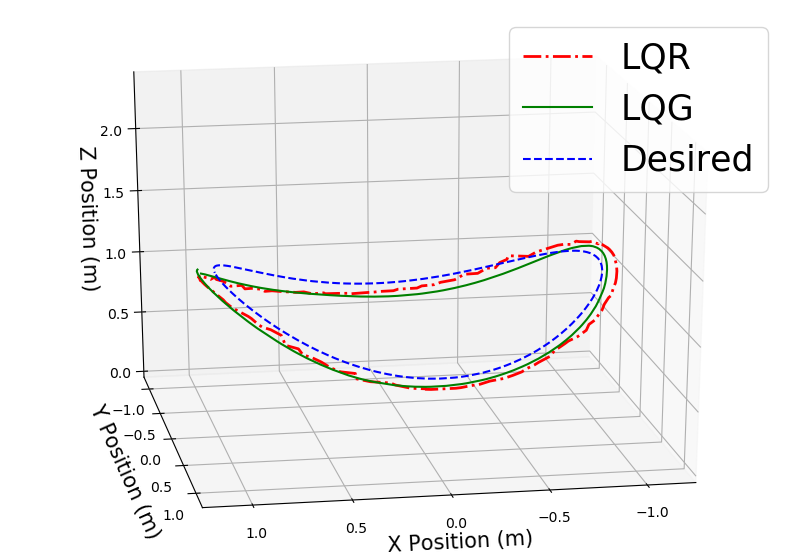

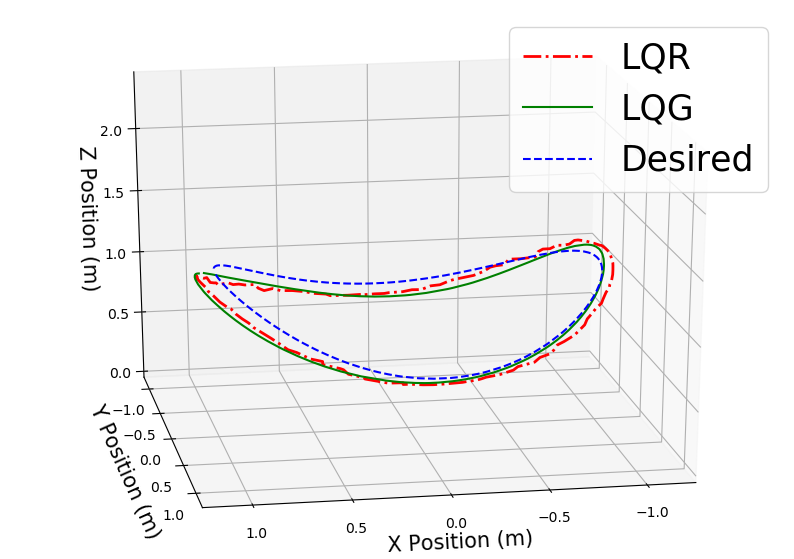

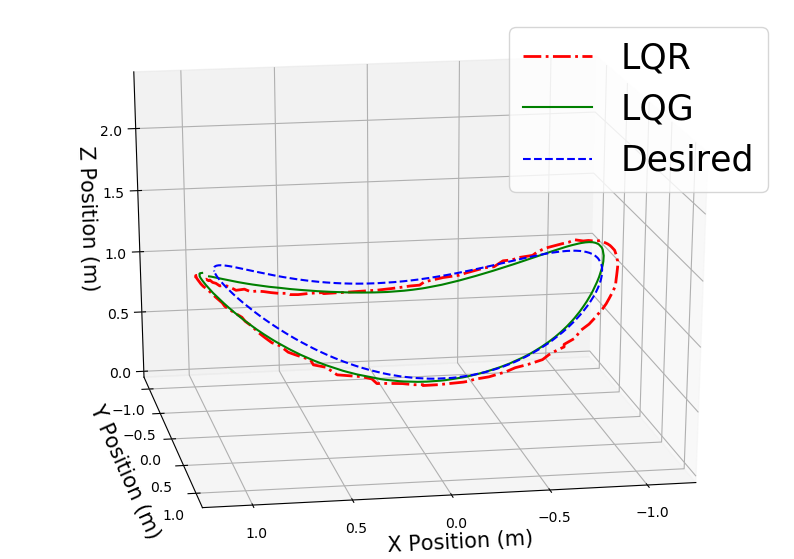

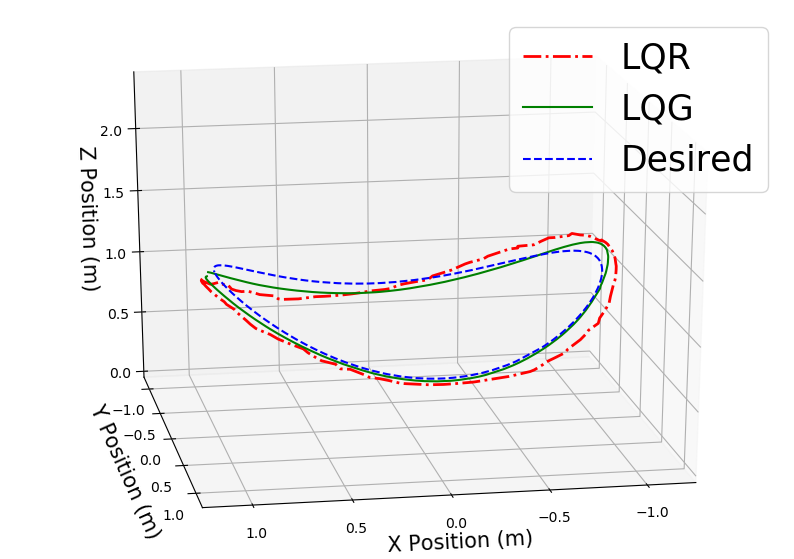

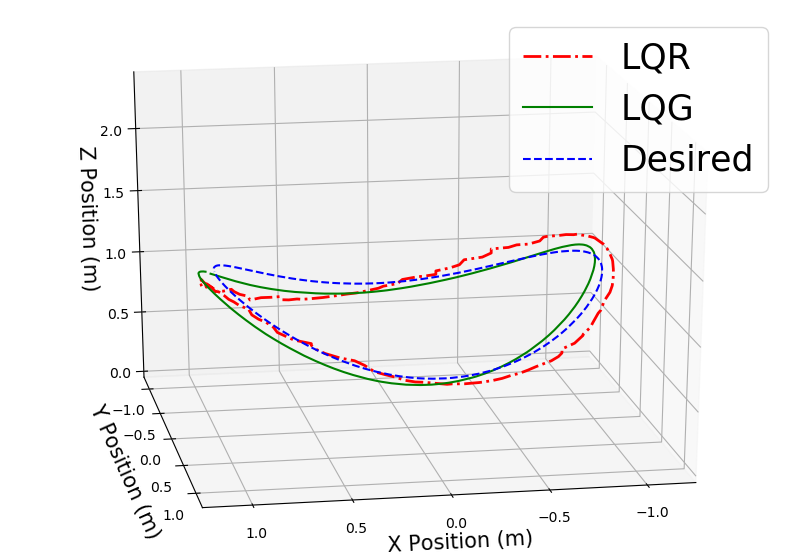

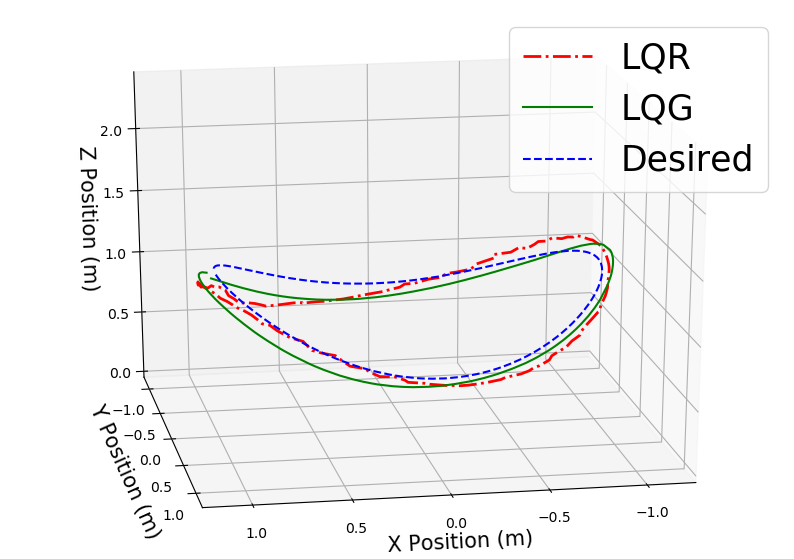

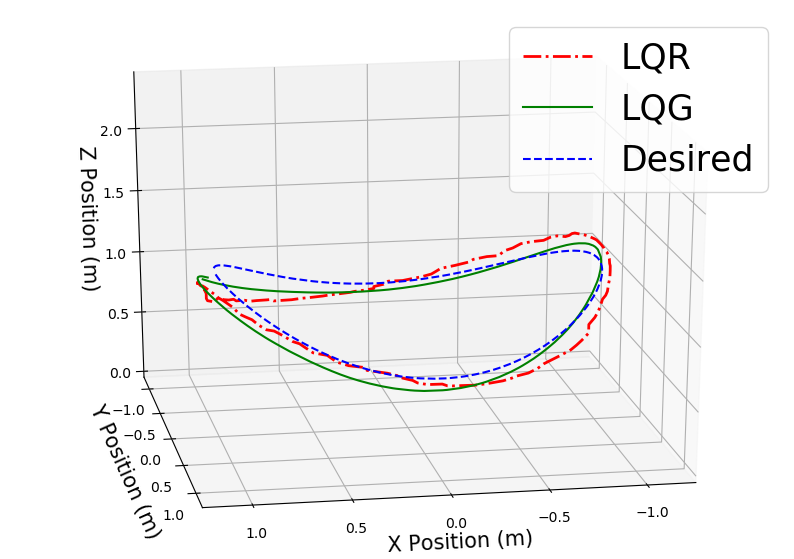

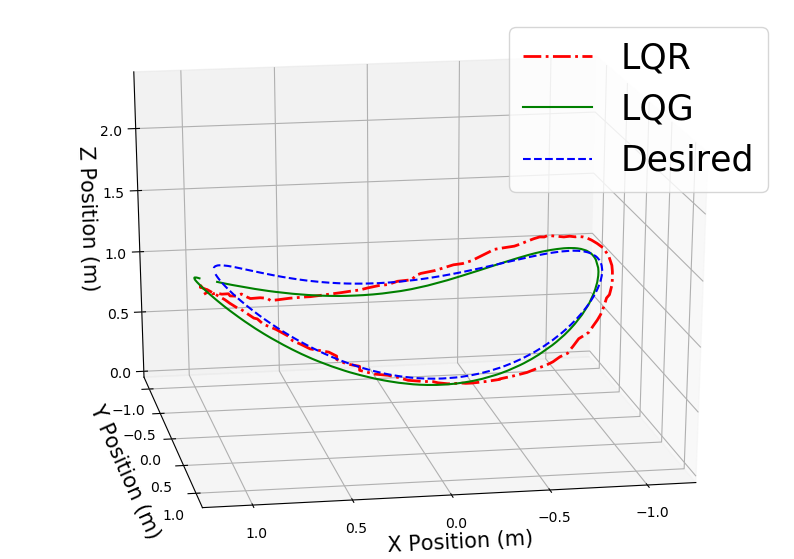

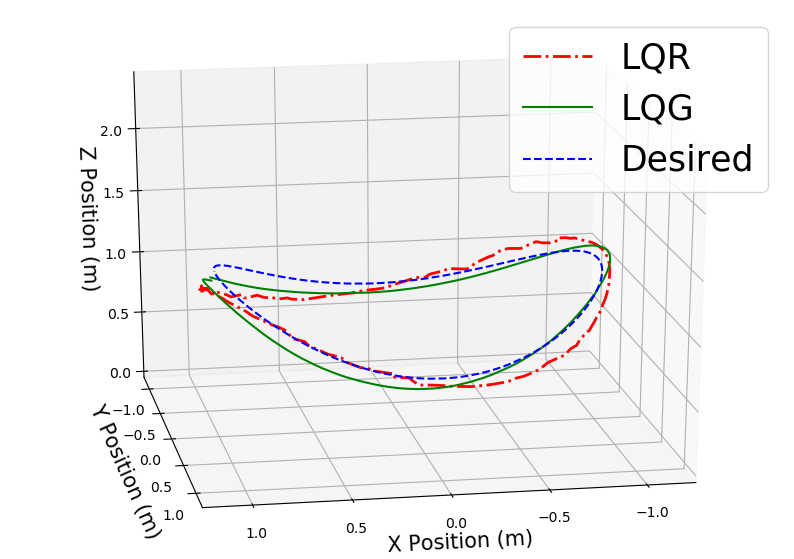

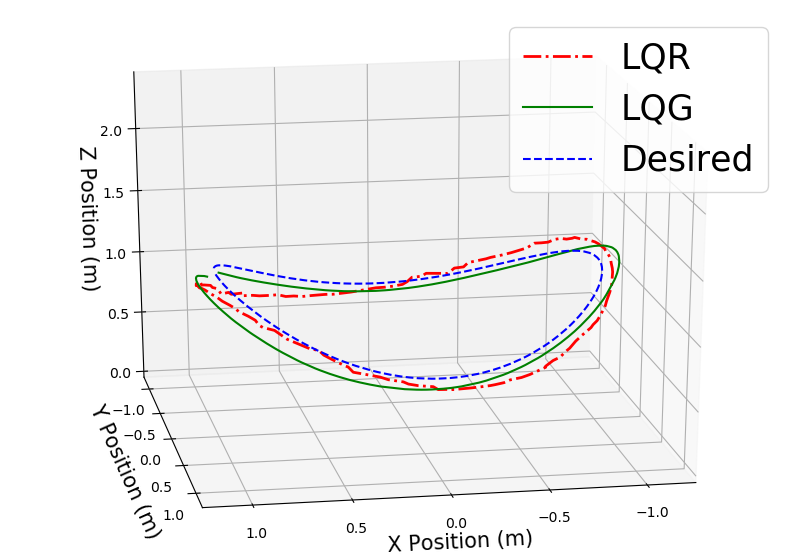

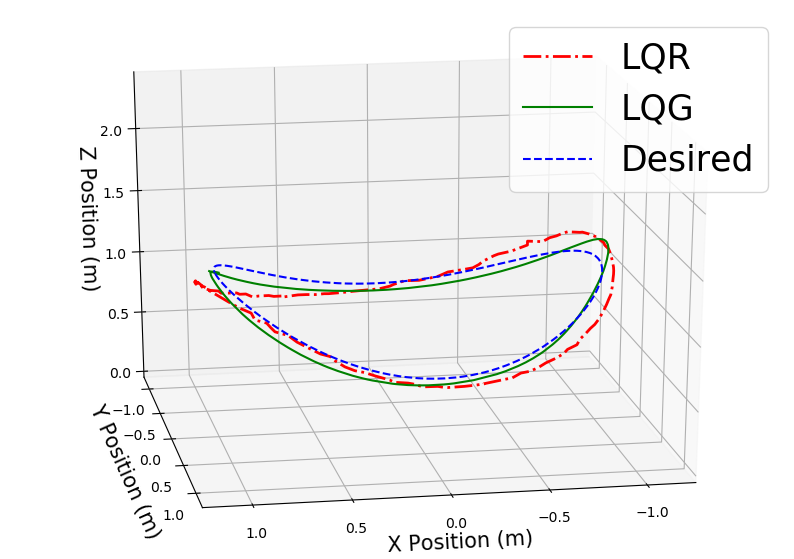

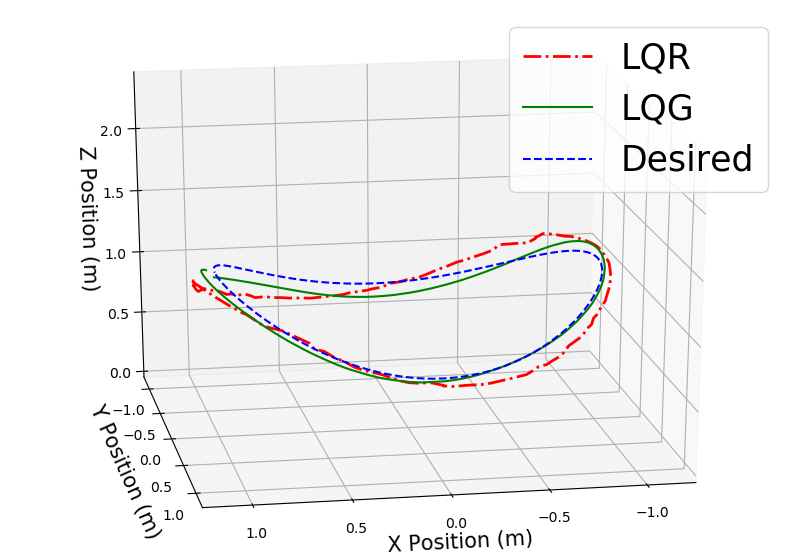

In [180]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
# Iterate over consecutive peaks
for i in range(len(peaks) - 1):
    # Cut the data between the current and next peak
    start_index = peaks[i]
    end_index = peaks[i + 1]
    
    time_cut = time[start_index:end_index]
    desired_position_cut = desired_position[start_index:end_index]
    position_kalman_cut = position_kalman[start_index:end_index]
    position_optitrack_cut = position_optitrack[start_index:end_index]
    
    # Creating a 3D plot for cut position comparison
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(position_optitrack_cut[:, 0], position_optitrack_cut[:, 1], position_kalman_cut[:, 2],label='LQR', linestyle='-.', color='red', alpha=1, linewidth=2)
    ax.plot(position_kalman_cut[:, 0], position_kalman_cut[:, 1], position_kalman_cut[:, 2], label='LQG', linestyle='-', color='green')
    ax.plot(desired_position_cut[:, 0], desired_position_cut[:, 1], desired_position_cut[:, 2], label='Desired', linestyle='--', color='blue')
    
    # ax.set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X, Y and Z Dimension)')
    ax.set_xlabel('X Position (m)', fontsize=15)
    ax.set_ylabel('Y Position (m)', fontsize=15)
    ax.set_zlabel('Z Position (m)' , fontsize=15)
    
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlim(-1.2, 1.2)
    ax.set_zlim(0, 2.4)
    
    # Change point of view
    ax.view_init(20, 80)
    
    # Zoom
    ax.dist = 9
    
    ax.legend(fontsize=25, loc='upper right')
    ax.grid(True)

    if save_flag:
        vectorized_image_path = f'3D_position_comparison_{i}.pdf'
        full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
        plt.savefig(full_vectorized_image_path, format='pdf')


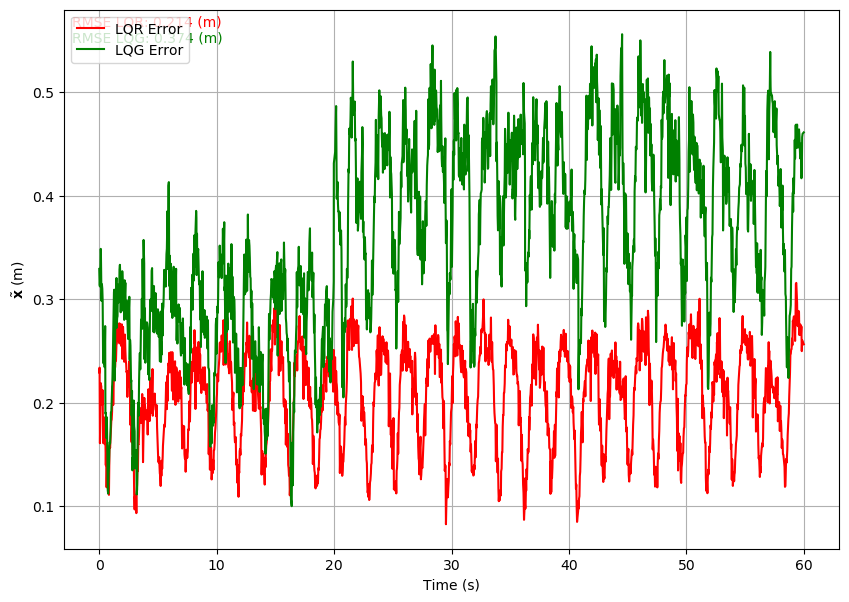

In [178]:
# Calculate the 3D point-to-point errors
point_to_point_error_kalman_3d = np.linalg.norm(position_kalman - desired_position, axis=1)
point_to_point_error_optitrack_3d = np.linalg.norm(position_optitrack - desired_position, axis=1)

# Calculate RMSE for point-to-point error
rmse_kalman_3d = np.sqrt(np.mean(point_to_point_error_kalman_3d**2))
rmse_optitrack_3d = np.sqrt(np.mean(point_to_point_error_optitrack_3d**2))

# Plotting the point-to-point errors
plt.figure(figsize=(10, 7))
plt.plot(time, point_to_point_error_optitrack_3d, label='LQR Error', color='red')
plt.plot(time, point_to_point_error_kalman_3d, label='LQG Error', color='green')

# Annotate the RMSE on the plot
plt.annotate(f'RMSE LQR: {rmse_optitrack_3d:.3f} (m)', xy=(0.01, 0.97), xycoords='axes fraction', fontsize=10, color='red')
plt.annotate(f'RMSE LQG: {rmse_kalman_3d:.3f} (m)', xy=(0.01, 0.94), xycoords='axes fraction', fontsize=10, color='green')

# plt.title('3D Point-to-Point Error')
plt.xlabel('Time (s)')
plt.ylabel(r'$\tilde{\mathbf{x}}$ (m)')

plt.legend()
plt.grid(True)

if save_flag:
    vectorized_image_path = '3D_point_to_point_error.pdf'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='pdf')